# [1] Python Libraries

In [ ]:
%pip install pyiast

  Created wheel for pyiast: filename=pyiast-1.4.3-cp36-none-any.whl size=10989 sha256=efe8291f491498c625dfe12d7208e3d4b89975756f6d22016330afd26330bd26
  Stored in directory: /root/.cache/pip/wheels/fa/b2/0f/5ca307f44b4342b99ae2298244003e59a50bcddc6900681d08
Successfully built pyiast


In [ ]:
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt

# [2] Data Importing

### [2-1] Base path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/Work_in_PNU/Data_C2_screen_ver02')
os.chdir('/content/drive/My Drive/Work_in_PNU/Data_C2_ALL_ver03')
#/content/drive/My Drive/Work_in_PNU/Data_Zeolite_NG
bas_path = os.getcwd()

Mounted at /content/drive


In [ ]:
os.listdir()

['iso_bins',
 'Reference_temperature.xlsx',
 'heat_summary.xlsx',
 'is_experimental_data.xlsx',
 'Names.xlsx',
 'Names.csv',
 'Rec.csv',
 'Recovery_vacuu_1vs15_full.png',
 'Recovery_vacuu_1vs15_top7.png',
 'Recovery_vacuu_83p_zoom.png',
 'bar_3vs40_1vs15.png',
 'Isotherm_Fittings']

### [2-2] File and adsorbent names

In [ ]:
print(os.listdir())

['iso_bins', 'Reference_temperature.xlsx', 'heat_summary.xlsx', 'is_experimental_data.xlsx', 'Names.xlsx', 'Names.csv', 'Rec.csv', 'Recovery_vacuu_1vs15_full.png', 'Recovery_vacuu_1vs15_top7.png', 'Recovery_vacuu_83p_zoom.png', 'bar_3vs40_1vs15.png', 'Isotherm_Fittings']


In [ ]:
os.chdir(bas_path)
os.chdir('iso_bins')
bin_nam_list = np.sort(os.listdir())
#print(bin_nam_list)
bin_list = []
is_exp = []
for fnam in bin_nam_list:
    f = open(fnam,'rb')
    bin_tmp = pickle.load(f)
    bin_list.append(bin_tmp)    
    f.close()
    if fnam[-13] == 'e' and fnam[-12] == 'x':
        is_exp.append(1)
        print(fnam)
    else:
        is_exp.append(0)

os.chdir(bas_path)
nam_pd = pd.read_excel('Names.xlsx')
code_arr = np.array(nam_pd['Code'])
cc = 0
for i in range(len(code_arr)):
    if code_arr[i][-1] != 'p':
        code_arr[i] = code_arr[i] + '_simul'
os.chdir(bas_path)
Names_arg = np.argsort(code_arr)
Names_tmp = np.array(nam_pd['Reported'])[Names_arg]
#print(Names_tmp)
Tref_pd = pd.read_excel('Reference_temperature.xlsx')
Tref_list = np.array(Tref_pd['T'])[Names_arg]
is_exp_pd = pd.read_excel('is_experimental_data.xlsx')
is_exp = np.array(is_exp_pd['is_exp'])[Names_arg]

iso_ACICOH_exp_saved.bin
iso_FeMOF74_exp_saved.bin
iso_HOF76_exp_saved.bin
iso_IRMOF8_exp_saved.bin
iso_MAF49_exp_saved.bin
iso_MIL142_exp_saved.bin
iso_MOF1_exp_saved.bin
iso_MUF15_exp_saved.bin
iso_NiBDC_exp_saved.bin
iso_PCN245_exp_saved.bin
iso_PCN250_exp_saved.bin
iso_ZIF69_exp_saved.bin
iso_ZIF8_exp_saved.bin


In [ ]:
print(code_arr)

['ACICOH_exp' 'FeMOF74_simul' 'FeMOF74_exp' 'GUMDEZ_simul' 'HOF76_simul'
 'HOF76_exp' 'ic403134c_si_002_simul' 'IRMOF8_simul' 'IRMOF8_exp'
 'MAF49_simul' 'MAF49_exp' 'MIL142_simul' 'MIL142_exp' 'MOF1_simul'
 'MOF1_exp' 'MUF15_simul' 'MUF15_exp' 'NiBDC_exp' 'Nibdcted_simul'
 'PCN245_simul' 'PCN245_exp' 'PCN250_simul' 'PCN250_exp' 'PEQRUZ_simul'
 'UFATEA01_simul' 'WOHPIU_simul' 'XUNGOD_simul' 'XUNSOQ_simul'
 'YUTDUO_simul' 'ZIF69_simul' 'ZIF69_exp' 'ZIF8_simul' 'ZIF8_exp']


In [ ]:
print(nam_pd)

                Code                      Reported
0         ACICOH_exp                    Ni(IN)$_2$
1            FeMOF74          Fe$_2$(O$_2$)(dobdc)
2        FeMOF74_exp  Fe$_2$(O$_2$)(dobdc)$_{exp}$
3             GUMDEZ                        GUMDEZ
4              HOF76                       HOF-76a
5          HOF76_exp               HOF-76a$_{exp}$
6   ic403134c_si_002                      ic403134
7             IRMOF8                       IRMOF-8
8         IRMOF8_exp               IRMOF-8$_{exp}$
9              MAF49                         MAF49
10         MAF49_exp                 MAF49$_{exp}$
11            MIL142                      MIL-142A
12        MIL142_exp              MIL-142A$_{exp}$
13              MOF1                  In-soc-MOF-1
14          MOF1_exp          In-soc-MOF-1$_{exp}$
15             MUF15                        MUF-15
16         MUF15_exp                MUF-15$_{exp}$
17         NiBDC_exp    Ni(bdc)(dabco)$_{0.5 exp}$
18          Nibdcted        Ni(

In [ ]:
dH_pd = pd.read_excel('heat_summary.xlsx')
dH_arr_uncut= np.array(dH_pd[dH_pd.keys()])[Names_arg]
Na_from_dH = dH_arr_uncut[:,0]
Na_from_nam  =np.array(nam_pd['Code'])[Names_arg]
Na_from_T = np.array(Tref_pd['Code'])[Names_arg]
print('File name | Code from dH | Code from Name| Code from T | Experiment')
print(' --- | ---| ---| ---| ---')
for i in range(len(Names_tmp)):
    #print([bin_nam_list[i], Names_tmp[[i][0]], is_exp[i]])
    print('{}|{}|{}|{}|{}'.format(bin_nam_list[i],
                               Na_from_dH[i],
                               Na_from_nam[i],
                               Na_from_T[i]
                               ,is_exp[i]))

File name | Code from dH | Code from Name| Code from T | Experiment
 --- | ---| ---| ---| ---
iso_ACICOH_exp_saved.bin|ACICOH_exp|ACICOH_exp|ACICOH_exp|1
iso_FeMOF74_exp_saved.bin|FeMOF74_exp|FeMOF74_exp|FeMOF74_exp|1
iso_Fe_MOF74_saved.bin|FeMOF74|FeMOF74|FeMOF74|0
iso_GUMDEZ_saved.bin|GUMDEZ|GUMDEZ|GUMDEZ|0
iso_HOF76_exp_saved.bin|HOF76_exp|HOF76_exp|HOF76_exp|1
iso_HOF76_saved.bin|HOF76|HOF76|HOF76|0
iso_IRMOF8_exp_saved.bin|IRMOF8_exp|IRMOF8_exp|IRMOF8_exp|1
iso_IRMOF8_saved.bin|IRMOF8|IRMOF8|IRMOF8|0
iso_MAF49_exp_saved.bin|MAF49_exp|MAF49_exp|MAF49_exp|1
iso_MAF49_saved.bin|MAF49|MAF49|MAF49|0
iso_MIL142_exp_saved.bin|MIL142_exp|MIL142_exp|MIL142_exp|1
iso_MIL142_saved.bin|MIL142|MIL142|MIL142|0
iso_MOF1_exp_saved.bin|MOF1_exp|MOF1_exp|MOF1_exp|1
iso_MOF_1_saved.bin|MOF1|MOF1|MOF1|0
iso_MUF15_exp_saved.bin|MUF15_exp|MUF15_exp|MUF15_exp|1
iso_MUF15_saved.bin|MUF15|MUF15|MUF15|0
iso_NiBDC_exp_saved.bin|NiBDC_exp|NiBDC_exp|NiBDC_exp|1
iso_Ni_bdc_ted_saved.bin|Nibdcted|Nibdcted|Nibdc

File name | Code from dH | Code from Name| Code from T | Experiment
 --- | ---| ---| ---| ---
iso_ACICOH_exp_saved.bin|ACICOH_exp|ACICOH_exp|ACICOH_exp|1
iso_FeMOF74_exp_saved.bin|FeMOF74_exp|FeMOF74_exp|FeMOF74_exp|1
iso_Fe_MOF74_saved.bin|FeMOF74|FeMOF74|FeMOF74|0
iso_GUMDEZ_saved.bin|GUMDEZ|GUMDEZ|GUMDEZ|0
iso_HOF76_exp_saved.bin|HOF76_exp|HOF76_exp|HOF76_exp|1
iso_HOF76_saved.bin|HOF76|HOF76|HOF76|0
iso_IRMOF8_exp_saved.bin|IRMOF8_exp|IRMOF8_exp|IRMOF8_exp|1
iso_IRMOF8_saved.bin|IRMOF8|IRMOF8|IRMOF8|0
iso_MAF49_exp_saved.bin|MAF49_exp|MAF49_exp|MAF49_exp|1
iso_MAF49_saved.bin|MAF49|MAF49|MAF49|0
iso_MIL142_exp_saved.bin|MIL142_exp|MIL142_exp|MIL142_exp|1
iso_MIL142_saved.bin|MIL142|MIL142|MIL142|0
iso_MOF1_exp_saved.bin|MOF1_exp|MOF1_exp|MOF1_exp|1
iso_MOF_1_saved.bin|MOF1|MOF1|MOF1|0
iso_MUF15_exp_saved.bin|MUF15_exp|MUF15_exp|MUF15_exp|1
iso_MUF15_saved.bin|MUF15|MUF15|MUF15|0
iso_NiBDC_exp_saved.bin|NiBDC_exp|NiBDC_exp|NiBDC_exp|1
iso_Ni_bdc_ted_saved.bin|Nibdcted|Nibdcted|Nibdcted|0
iso_PCN245_exp_saved.bin|PCN245_exp|PCN245_exp|PCN245_exp|1
iso_PCN245_saved.bin|PCN245|PCN245|PCN245|0
iso_PCN250_exp_saved.bin|PCN250_exp|PCN250_exp|PCN250_exp|1
iso_PCN250_saved.bin|PCN250|PCN250|PCN250|0
iso_PEQRUZ_saved.bin|PEQRUZ|PEQRUZ|PEQRUZ|0
iso_UFATEA01_saved.bin|UFATEA01|UFATEA01|UFATEA01|0
iso_WOHPIU_saved.bin|WOHPIU|WOHPIU|WOHPIU|0
iso_XUNGOD_saved.bin|XUNGOD|XUNGOD|XUNGOD|0
iso_XUNSOQ_saved.bin|XUNSOQ|XUNSOQ|XUNSOQ|0
iso_YUTDUO_saved.bin|YUTDUO|YUTDUO|YUTDUO|0
iso_ZIF69_exp_saved.bin|ZIF69_exp|ZIF69_exp|ZIF69_exp|1
iso_ZIF69_saved.bin|ZIF69|ZIF69|ZIF69|0
iso_ZIF8_exp_saved.bin|ZIF8_exp|ZIF8_exp|ZIF8_exp|1
iso_ZIF8_saved.bin|ZIF8|ZIF8|ZIF8|0
iso_ic403134c_saved.bin|ic403134c_si_002|ic403134c_si_002|ic403134c_si_002|0

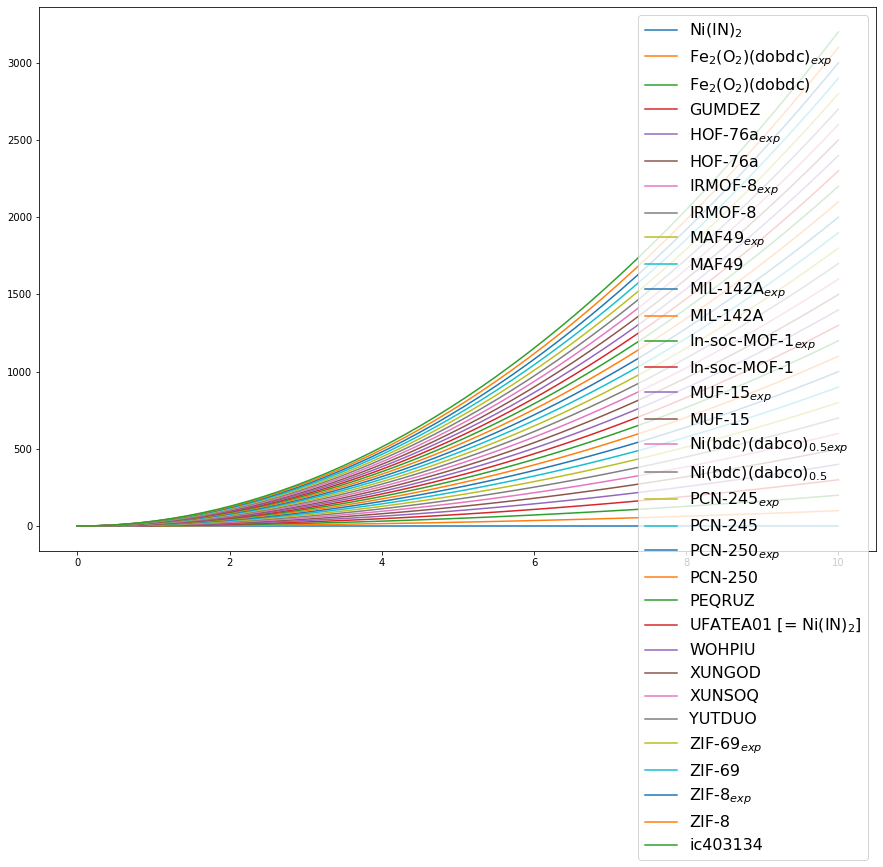

In [ ]:
cc = 0
plt.figure(figsize = [15, 10])
for nam in Names_tmp:
    plt.plot(np.linspace(0,10), cc*np.linspace(0,10)**2)
    cc = cc+1
Names_tmp = list(np.array(nam_pd['Reported'])[Names_arg])
plt.legend(Names_tmp,fontsize = 16)

Name_list = Names_tmp
#print(Name_list)

## Ethylene

RMSE:   0.009199833953797778
MODEL:  Quadratic
{'M': 1.5519152870639144, 'Ka': 66.60417857140993, 'Kb': 1708.1035827647347}


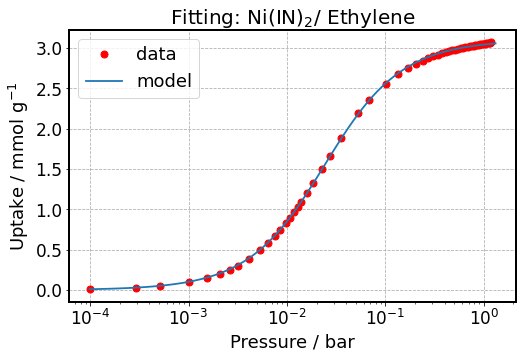

RMSE:   0.011083408853769051
MODEL:  Quadratic
{'M': 1.697261454964437, 'Ka': 7.7311305100100505, 'Kb': 10.729422486779011}


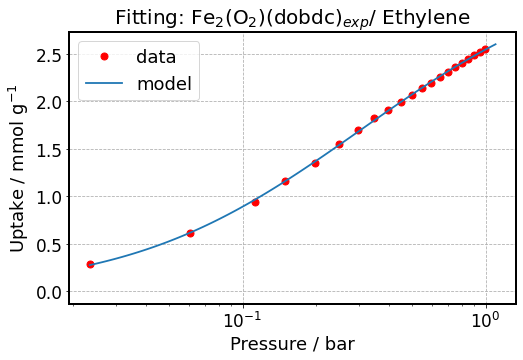

RMSE:   0.06157781759384369
MODEL:  Quadratic
{'M': 2.315175636035412, 'Ka': 3.640606866395922, 'Kb': 4.4708619164800005}


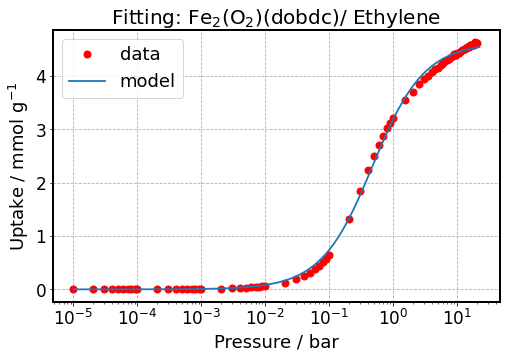

RMSE:   0.02722421344205416
MODEL:  Quadratic
{'M': 3.231023010682909, 'Ka': 288.39258456473834, 'Kb': 28.5356618865136}


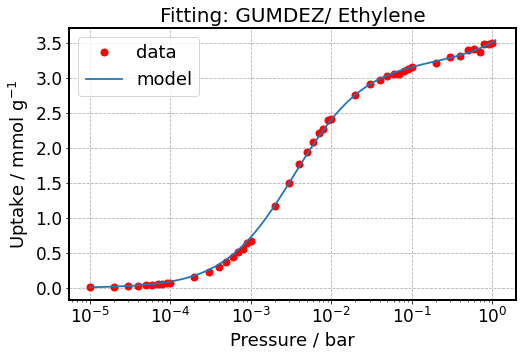

RMSE:   0.005573655139581886
MODEL:  Quadratic
{'M': 1.5382532913287688, 'Ka': 1.0248910081697618, 'Kb': 1.317909975876734}


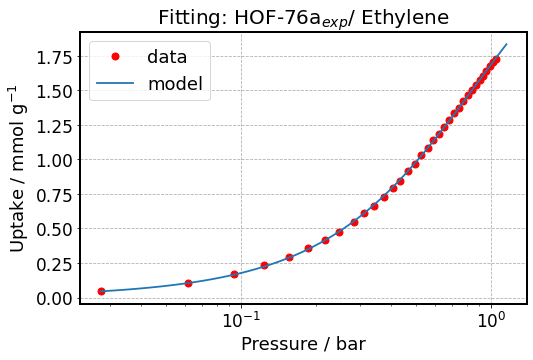

RMSE:   0.021472220039258177
MODEL:  Quadratic
{'M': 2.3924844039515842, 'Ka': 0.5920264659113135, 'Kb': 0.3170718158871926}


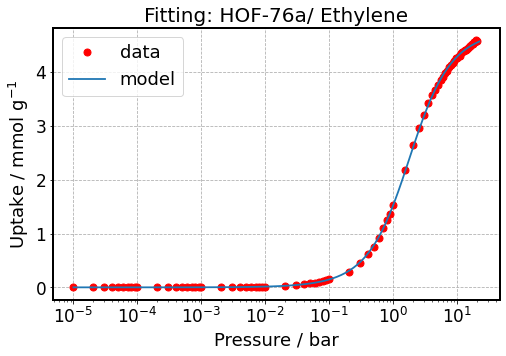

RMSE:   0.09518495739940097
MODEL:  Langmuir
{'M': 9.202776955977114, 'K': 0.4683420259305598}


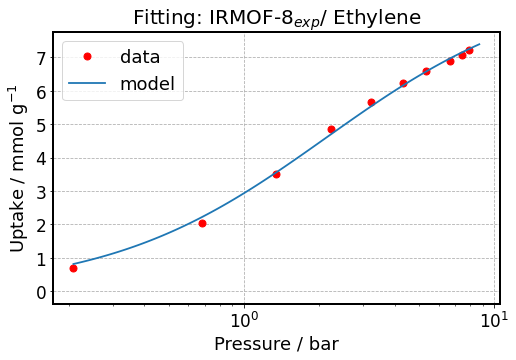

RMSE:   0.21236320704065953
MODEL:  Quadratic
{'M': 13.873664580963329, 'Ka': 0.05725365537477691, 'Kb': 0.017364240049023198}


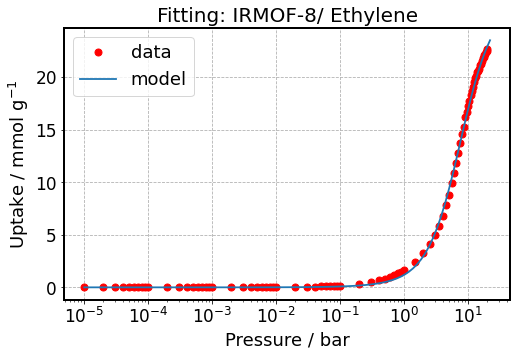

RMSE:   0.010843316121371389
MODEL:  Quadratic
{'M': 0.8612759642037168, 'Ka': 191.7551593939632, 'Kb': 9207.31958337239}


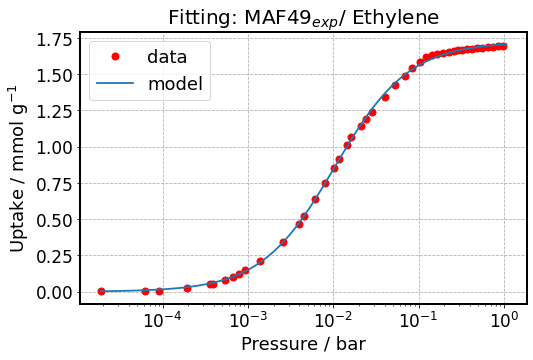

RMSE:   0.004345386059642257
MODEL:  Quadratic
{'M': 1.0264736638856058, 'Ka': 1381.8712816837715, 'Kb': 687979.5394791747}


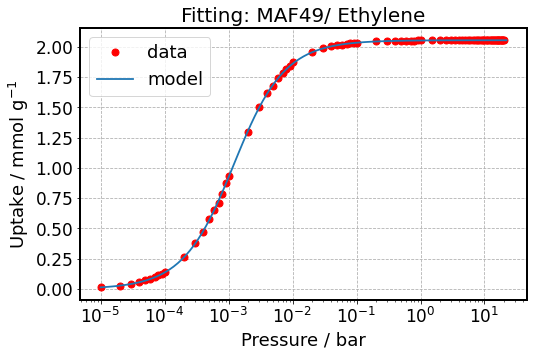

RMSE:   0.006694530393814911
MODEL:  Langmuir
{'M': 13.260621107067173, 'K': 0.2847838642933469}


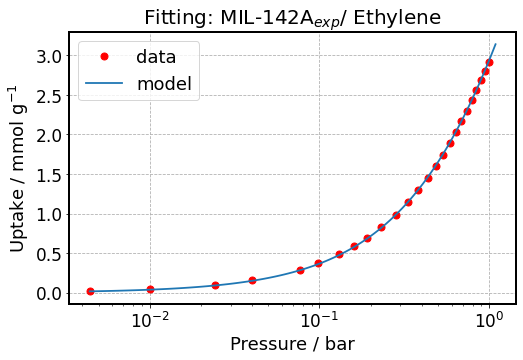

RMSE:   0.04603519968924854
MODEL:  Quadratic
{'M': 4.468697479620567, 'Ka': 1.648457711192969, 'Kb': 0.49683232441510317}


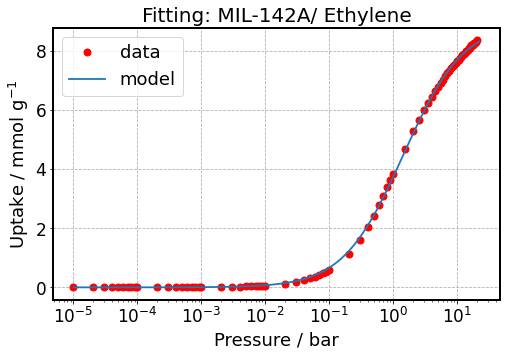

RMSE:   0.009775270912858123
MODEL:  Langmuir
{'M': 6.237740930348569, 'K': 1.4975184864680884}


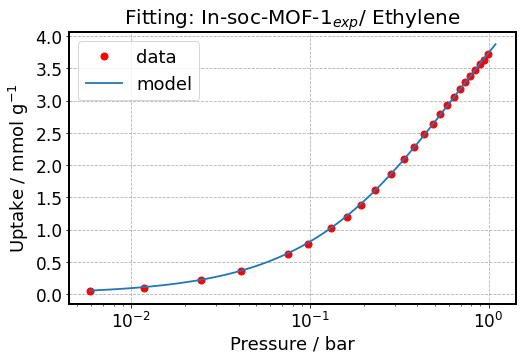

RMSE:   0.0351322679727089
MODEL:  DSLangmuir
{'M1': 2.018471640720315, 'K1': 0.05303183888138864, 'M2': 5.82022484971619, 'K2': 6.801582216607235}


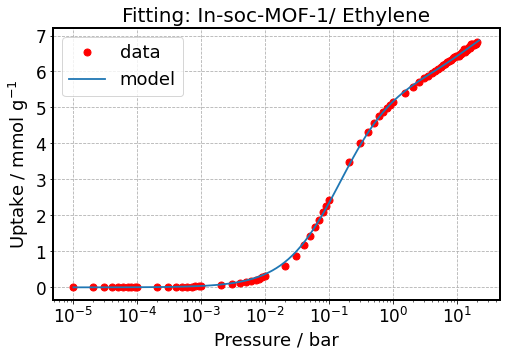

RMSE:   0.0073662346252768626
MODEL:  Quadratic
{'M': 3.123087794293858, 'Ka': 4.5748588452438685, 'Kb': 4.203191909474724}


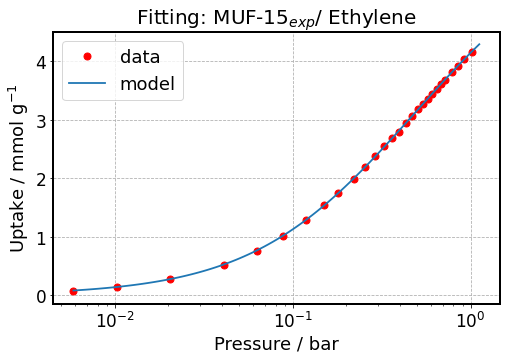

RMSE:   0.026502512028519852
MODEL:  Quadratic
{'M': 2.079672621244638, 'Ka': 5.108572382339638, 'Kb': 4.605246993796285}


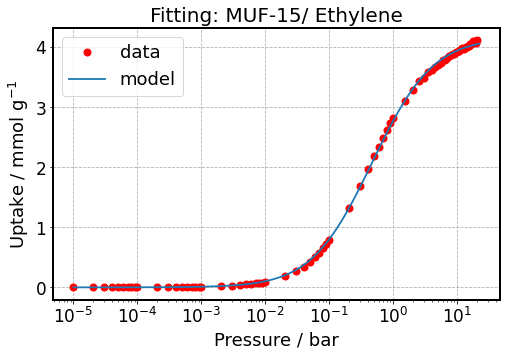

RMSE:   0.011562049651845548
MODEL:  Quadratic
{'M': 6.265743151111646, 'Ka': 0.4879751786152253, 'Kb': 0.229019490733592}


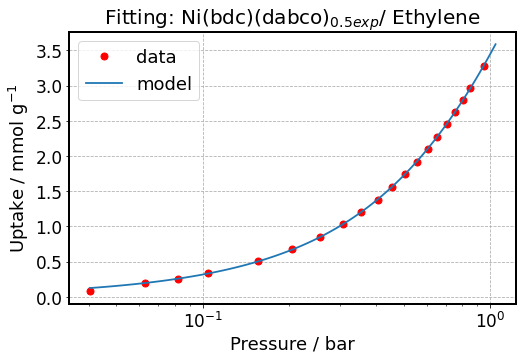

RMSE:   0.06084588969098356
MODEL:  Quadratic
{'M': 4.351402924674955, 'Ka': 2.2648516249216155, 'Kb': 1.050638595285128}


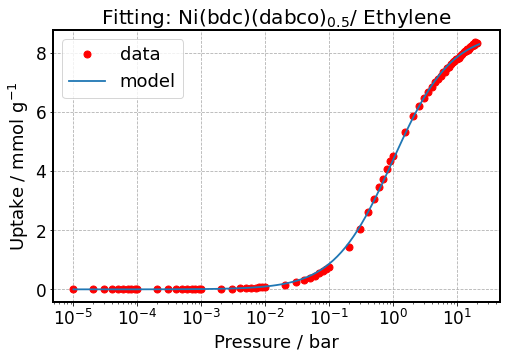

RMSE:   0.0032014637022966825
MODEL:  Langmuir
{'M': 14.48963945778465, 'K': 0.2004214130181076}


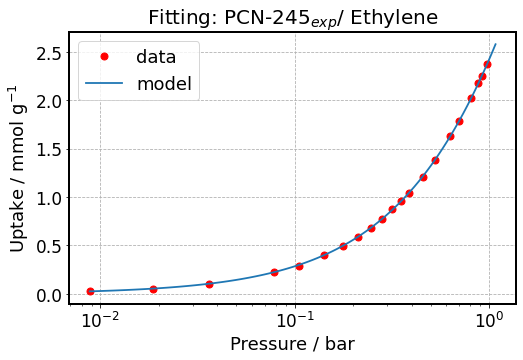

RMSE:   0.04092224653616945
MODEL:  Quadratic
{'M': 5.815242782241155, 'Ka': 0.6255625670624548, 'Kb': 0.23167661584142218}


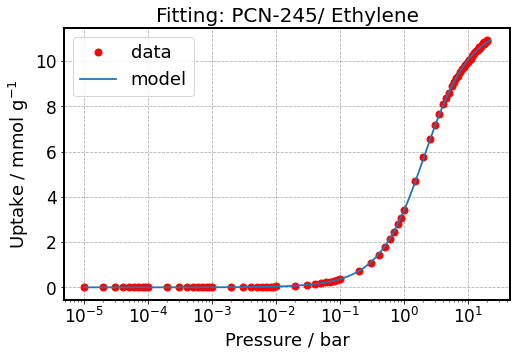

RMSE:   0.0048985523861781715
MODEL:  Quadratic
{'M': 2.965559689796483, 'Ka': 3.2164209177727097, 'Kb': 4.828945749276054}


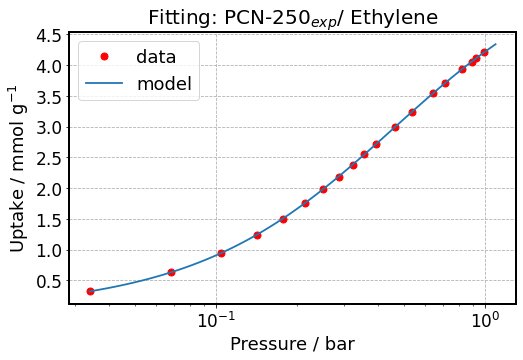

RMSE:   0.08496169148784087
MODEL:  Quadratic
{'M': 3.654077018394335, 'Ka': 6.587924677254206, 'Kb': 7.4226704030787705}


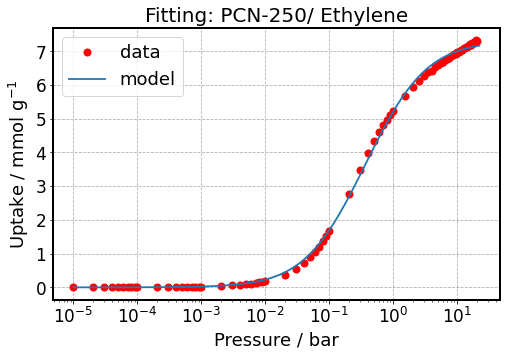

RMSE:   0.012851000955079706
MODEL:  Quadratic
{'M': 1.891016582247576, 'Ka': 146.21298332630985, 'Kb': 6658.477734180119}


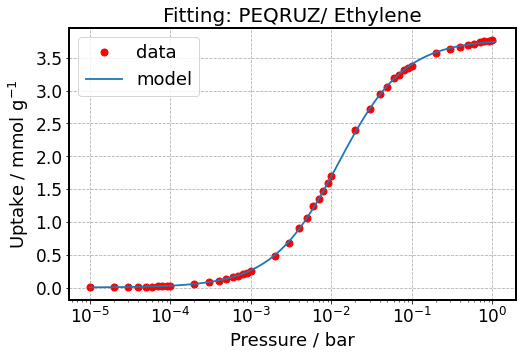

RMSE:   0.012365328941899416
MODEL:  Quadratic
{'M': 1.6601018099869331, 'Ka': 226.43627913299582, 'Kb': 28010.40298178424}


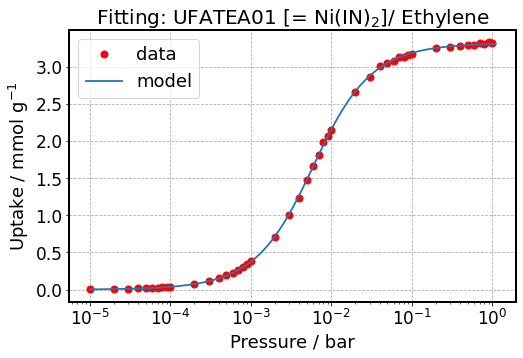

RMSE:   0.016327423793033594
MODEL:  DSLangmuir
{'M1': 0.6305193388937251, 'K1': 2.7959653835828746, 'M2': 3.7428499016743313, 'K2': 268.35717323925786}


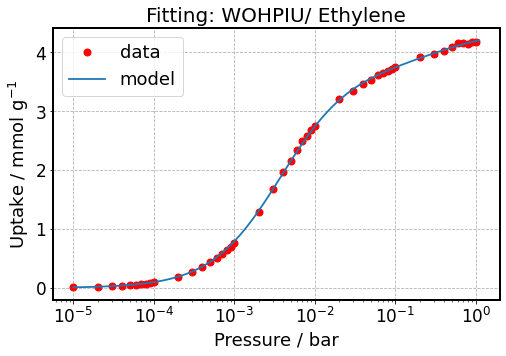

RMSE:   0.012285051137845147
MODEL:  Quadratic
{'M': 1.9339484511048253, 'Ka': 86.56300884401648, 'Kb': 6320.100947239223}


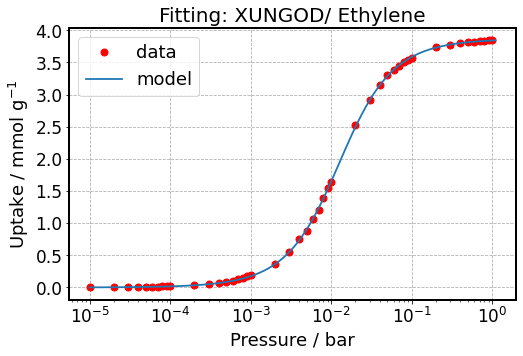

RMSE:   0.014514494440382955
MODEL:  Quadratic
{'M': 1.937504083844578, 'Ka': 84.47837498458766, 'Kb': 4979.434594785562}


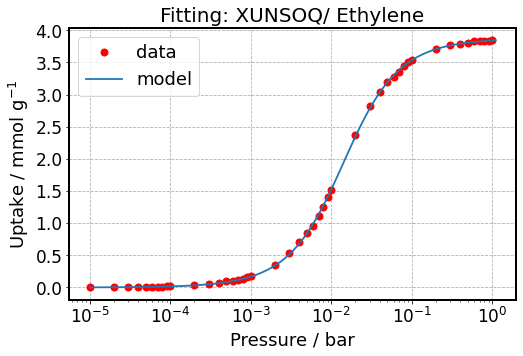

RMSE:   0.05139834444453396
MODEL:  Quadratic
{'M': 4.151491431020167, 'Ka': 130.31356101530042, 'Kb': 9.542442876636787}


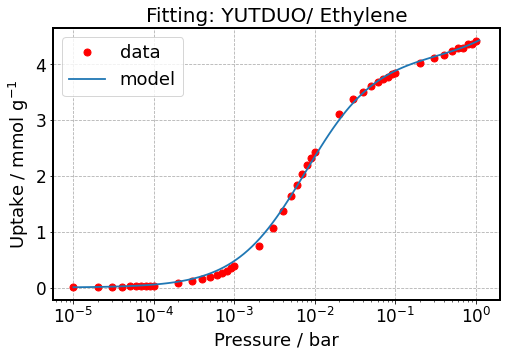

RMSE:   0.009733658797375366
MODEL:  Langmuir
{'M': 3.05795784152601, 'K': 1.3928577068282484}


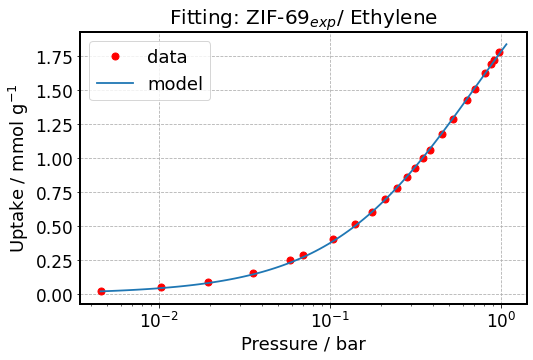

RMSE:   0.01746991557438738
MODEL:  Quadratic
{'M': 2.3204733834479816, 'Ka': 7.324721858632234, 'Kb': 4.557006031485239}


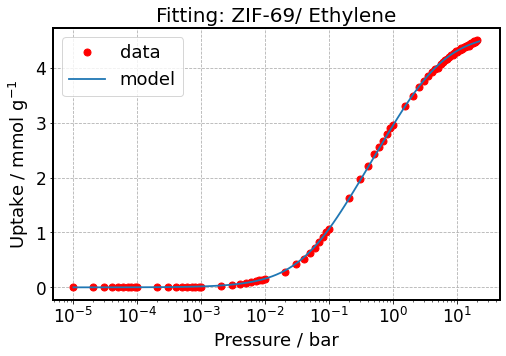

RMSE:   0.004952376339551542
MODEL:  Quadratic
{'M': 1.6804364516490566, 'Ka': 0.757375063239903, 'Kb': 0.6206796734835662}


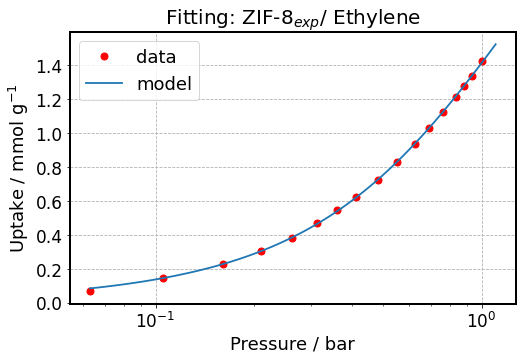

RMSE:   0.04426072494907548
MODEL:  Quadratic
{'M': 2.8511767832869164, 'Ka': 1.8703559189061838, 'Kb': 0.9477734923558301}


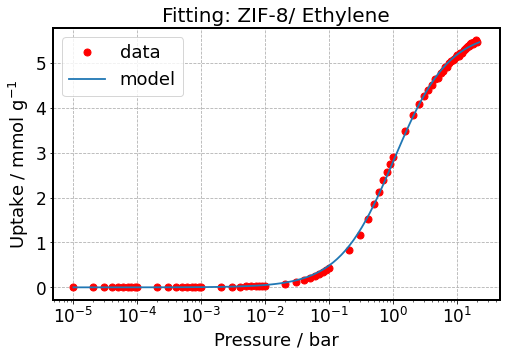

RMSE:   0.017556086514930184
MODEL:  Quadratic
{'M': 1.9325413995604708, 'Ka': 92.43200175788598, 'Kb': 7304.932200269065}


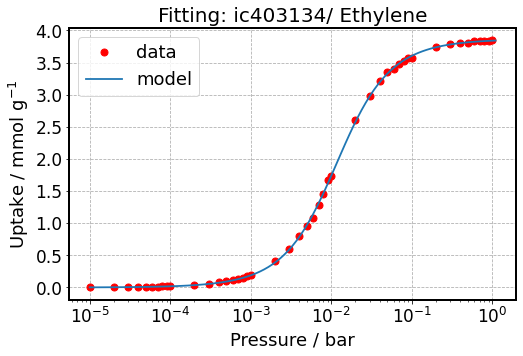

In [ ]:
### TEST ###
os.chdir(bas_path)
os.chdir('ethylene')
for i in range(len(bin_list)):
    #N_pick = 8
    iso_tmp = bin_list[i][1]
    rmse_tmp = iso_tmp.rmse
    model_tmp = iso_tmp.model
    param_tmp = iso_tmp.params

    #pyiast.plot_isotherm(iso_tmp,withfit = False)
    #iso_tmp.print_params()
    print('RMSE:  ',rmse_tmp)
    print('MODEL: ', model_tmp)
    print(param_tmp)
    ### GRAPH
    plt.figure(figsize = [1.6*5,1*5])
    ppp = np.array(iso_tmp.df['P'])
    qqq =np.array(iso_tmp.df['q'])
    plt.rcParams['axes.linewidth'] = 2
    plt.semilogx(ppp,qqq,'ro',mfc = 'r',markersize = 7)
    if ppp[0] < 0:
        p_tmp = np.logspace(np.log10(ppp[1]),np.log10(ppp[-1]*1.1),101)
    else:
        p_tmp = np.logspace(np.log10(ppp[0]),np.log10(ppp[-1]*1.1),101)
    plt.plot(p_tmp,iso_tmp.loading(p_tmp),lw = 1.8)
    plt.grid(linestyle = '--')
    plt.xlabel('Pressure / bar',fontsize = 18)
    plt.ylabel('Uptake / mmol g$^{-1}$',fontsize = 18)
    plt.legend(['data','model'], fontsize = 18)
    plt.xticks(fontsize = 17)
    plt.yticks(fontsize = 17)
    #plt.title('Fitting: ' + Name_list[N_pick] + '/ Ethane',fontsize = 14.5)
    plt.title('Fitting: ' + Name_list[i] + '/ Ethylene',fontsize = 20)
    
    plt.savefig(Name_list[i]+'_ethylene.png')
    plt.show()

os.chdir(bas_path)

## Ethane

In [ ]:

print(os.getcwd())

/content/drive/MyDrive/Work_in_PNU/Data_C2_ALL_ver03


RMSE:   0.0169801492302737
MODEL:  Quadratic
{'M': 1.5239209635061184, 'Ka': 164.3338322459548, 'Kb': 12327.427322009924}


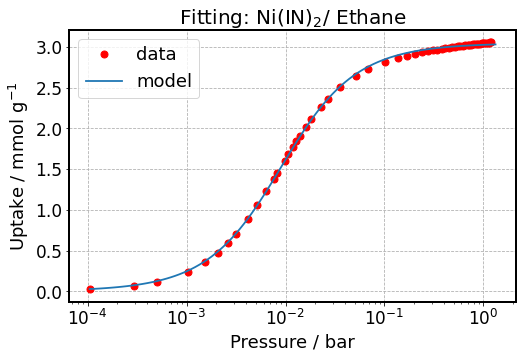

RMSE:   0.03788387041151192
MODEL:  Quadratic
{'M': 1.9128898499317684, 'Ka': 31.535562758502437, 'Kb': 102.42592176269316}


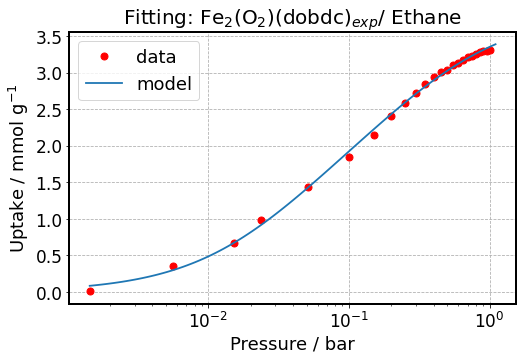

RMSE:   0.07010034699968888
MODEL:  Quadratic
{'M': 2.1938669803132296, 'Ka': 9.605640338963415, 'Kb': 21.016706965412624}


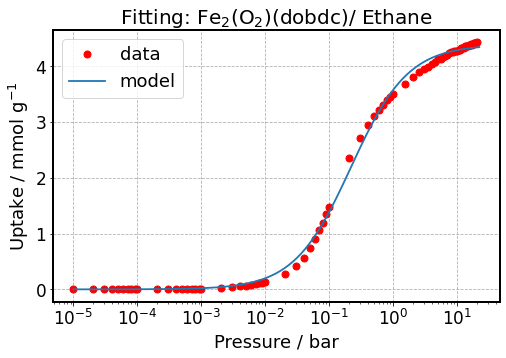

RMSE:   0.028719778088529886
MODEL:  Quadratic
{'M': 3.191882806381739, 'Ka': 1119.0920762937308, 'Kb': 70.25826135475077}


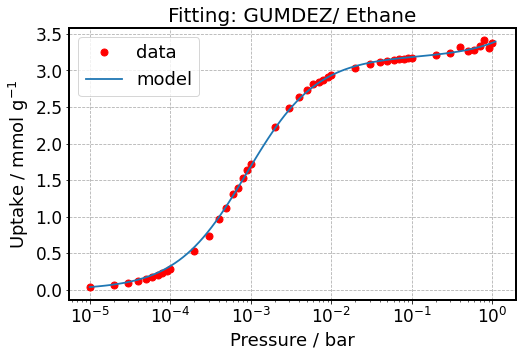

RMSE:   0.006842338088959059
MODEL:  Quadratic
{'M': 2.1870599301943425, 'Ka': 1.2061581315240453, 'Kb': 2.599821118457791}


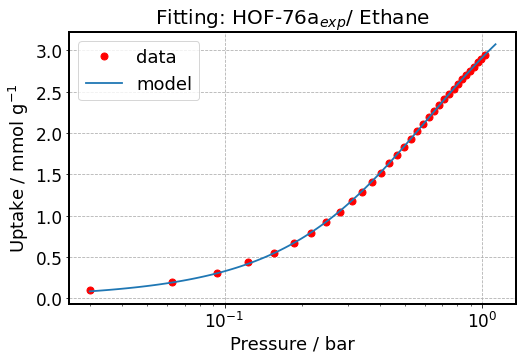

RMSE:   0.031055981338366432
MODEL:  Quadratic
{'M': 2.32935520808686, 'Ka': 1.2741974690786624, 'Kb': 1.1686980756226184}


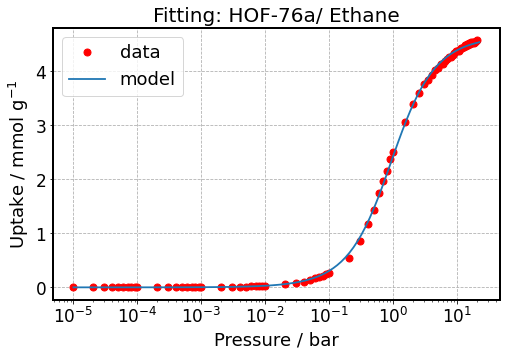

RMSE:   0.13017912661852316
MODEL:  Langmuir
{'M': 7.996848389749087, 'K': 1.0305379392303842}


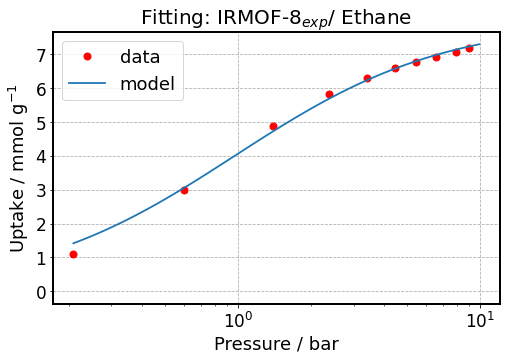

RMSE:   0.2783882999871774
MODEL:  Quadratic
{'M': 12.511071151873477, 'Ka': 0.06820138137441031, 'Kb': 0.060291383488143516}


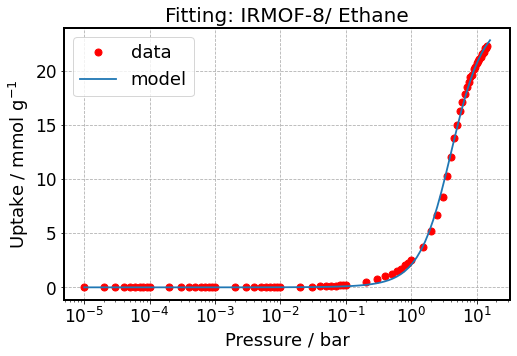

RMSE:   0.012452253647200722
MODEL:  Quadratic
{'M': 0.853223407811849, 'Ka': 612.845937093767, 'Kb': 132540.3650785838}


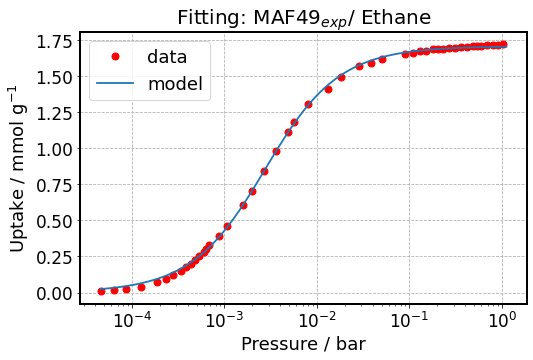

RMSE:   0.005367609619767001
MODEL:  Quadratic
{'M': 1.0263500269424386, 'Ka': 4534.790965350789, 'Kb': 7996856.367277242}


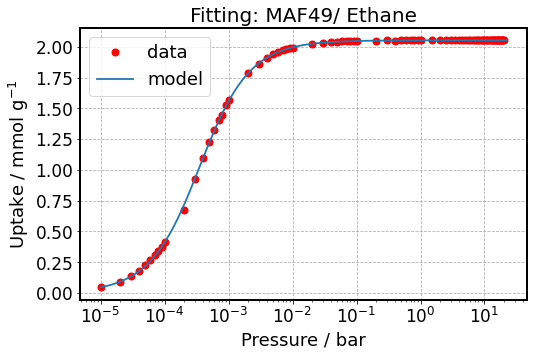

RMSE:   0.019190481745521418
MODEL:  Langmuir
{'M': 13.225241882702646, 'K': 0.4135999596535894}


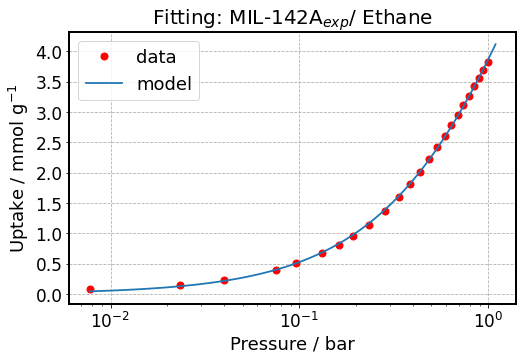

RMSE:   0.08302187354409266
MODEL:  Quadratic
{'M': 4.0956516795427, 'Ka': 3.9447757401244843, 'Kb': 2.174539928721634}


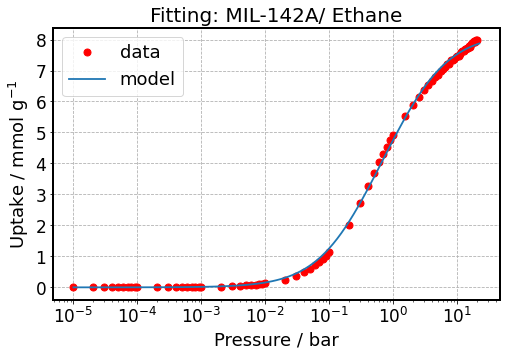

RMSE:   0.03159155050583763
MODEL:  Langmuir
{'M': 5.710941010240206, 'K': 2.4903509892654196}


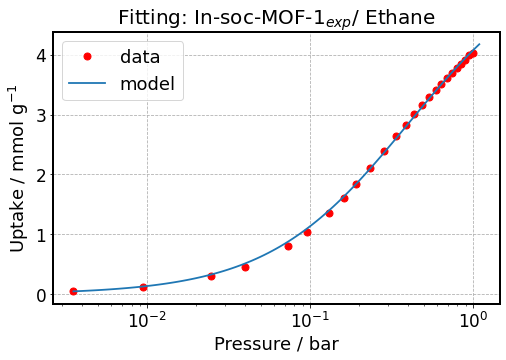

RMSE:   0.0427490260826683
MODEL:  DSLangmuir
{'M1': 1.5681003510109335, 'K1': 0.08709142742075224, 'M2': 5.587109618105331, 'K2': 18.239164673700962}


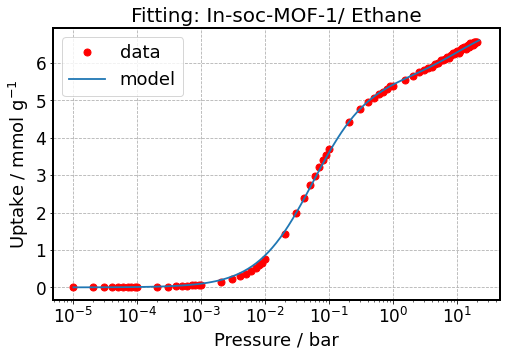

RMSE:   0.016045098323696393
MODEL:  Quadratic
{'M': 2.887946592232768, 'Ka': 9.083314657156222, 'Kb': 18.498205735216747}


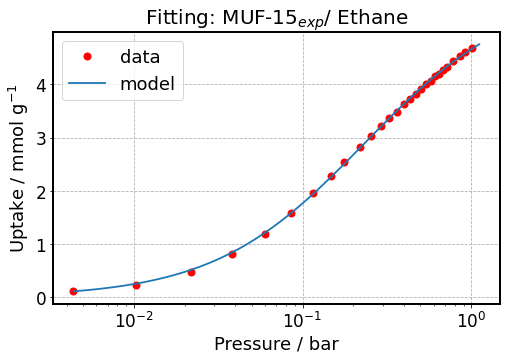

RMSE:   0.015022205881099739
MODEL:  Quadratic
{'M': 1.9987873779004173, 'Ka': 10.823691242194553, 'Kb': 18.199919760115712}


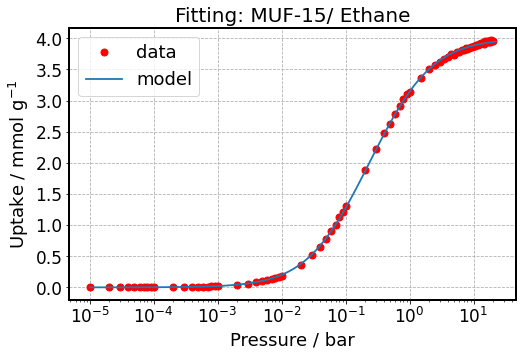

RMSE:   0.019530190853903815
MODEL:  Quadratic
{'M': 4.6384657645902365, 'Ka': 0.9539848318057162, 'Kb': 1.2332620602766213}


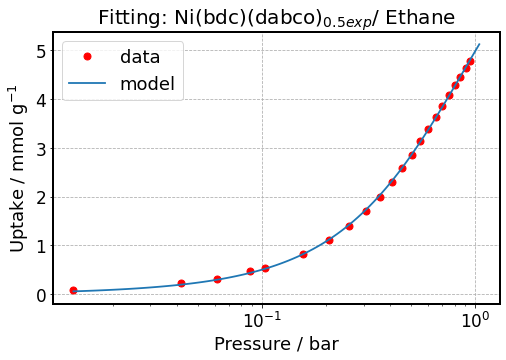

RMSE:   0.07888268273741479
MODEL:  Quadratic
{'M': 4.060153752316059, 'Ka': 5.208872378095344, 'Kb': 4.093945534317492}


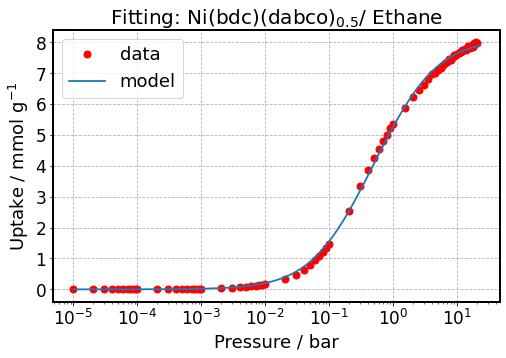

RMSE:   0.011466938963034096
MODEL:  Langmuir
{'M': 12.406068392936099, 'K': 0.3671039160700155}


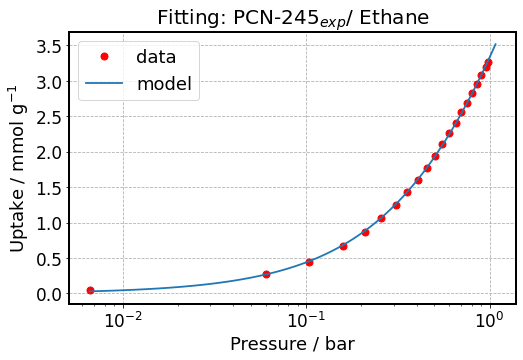

RMSE:   0.06722208274836104
MODEL:  Quadratic
{'M': 5.478912859073095, 'Ka': 1.3650480248425598, 'Kb': 0.914622191294395}


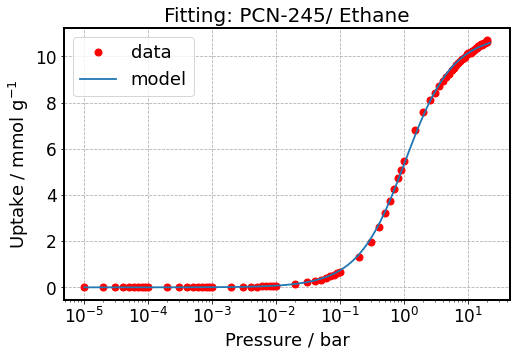

RMSE:   0.009958607414389075
MODEL:  Quadratic
{'M': 3.0970820730281012, 'Ka': 4.809149671966951, 'Kb': 15.533225934424426}


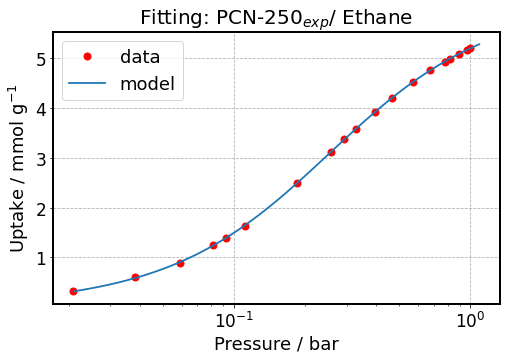

RMSE:   0.08834218441066564
MODEL:  Quadratic
{'M': 3.491475288079899, 'Ka': 18.111176225023783, 'Kb': 40.1726109196475}


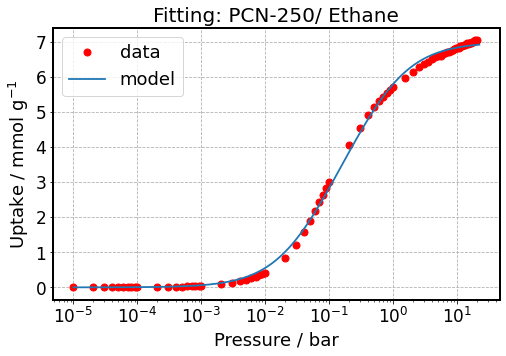

RMSE:   0.021346359195699195
MODEL:  Quadratic
{'M': 1.8662885470653705, 'Ka': 503.3978259653208, 'Kb': 77025.87698817172}


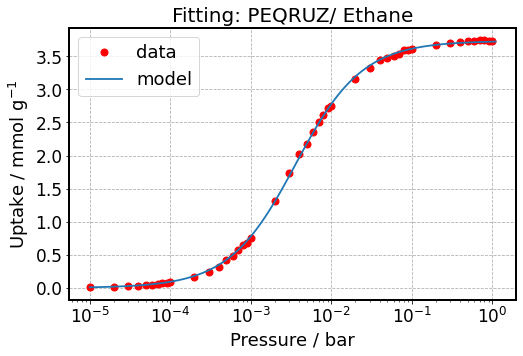

RMSE:   0.010825657966399253
MODEL:  Quadratic
{'M': 1.649694776953134, 'Ka': 673.0730036389746, 'Kb': 368146.6926357036}


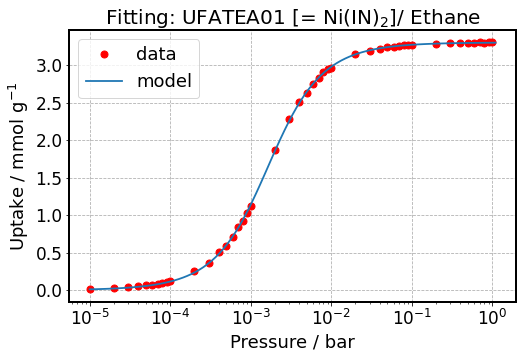

RMSE:   0.020815222475773106
MODEL:  DSLangmuir
{'M1': 0.7089303268502791, 'K1': 7.273489068205036, 'M2': 3.573760098485895, 'K2': 1134.2055335208795}


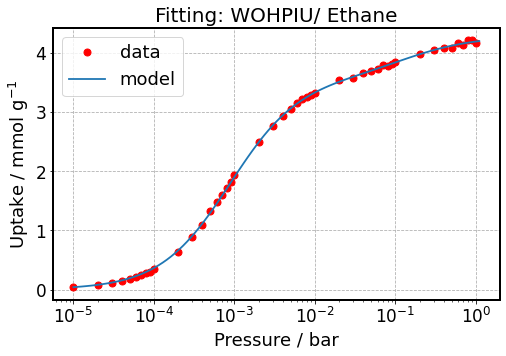

RMSE:   0.014669663725519559
MODEL:  Quadratic
{'M': 1.9375246623507392, 'Ka': 233.39206761127153, 'Kb': 65808.45106723219}


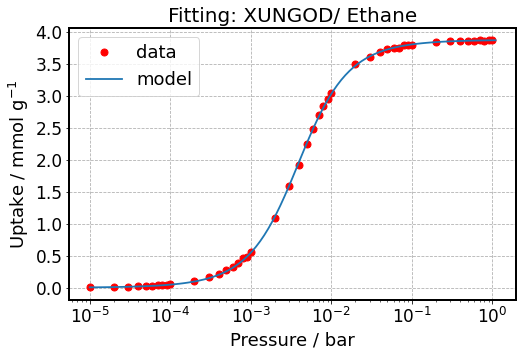

RMSE:   0.014969785168391985
MODEL:  Quadratic
{'M': 1.935094580599069, 'Ka': 252.45725185850472, 'Kb': 60230.1414461079}


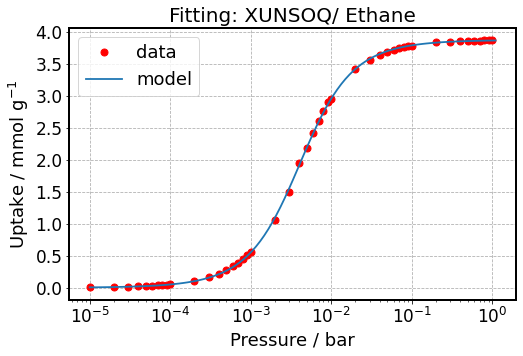

RMSE:   0.105082064902179
MODEL:  Quadratic
{'M': 4.100039174912558, 'Ka': 475.0004472435057, 'Kb': 17.85625322499639}


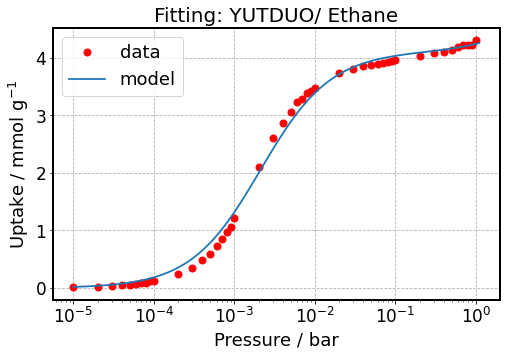

RMSE:   0.013518378232137347
MODEL:  Langmuir
{'M': 3.0059766856209893, 'K': 2.301875250127647}


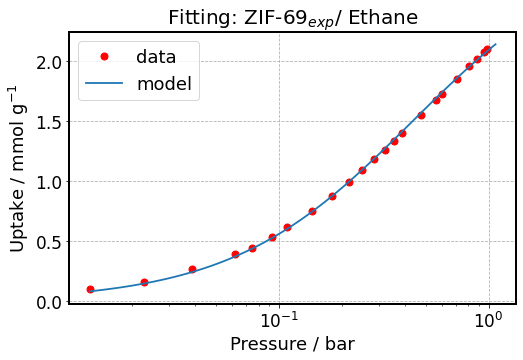

RMSE:   0.024609952035637338
MODEL:  Quadratic
{'M': 2.17638675521659, 'Ka': 16.999235423506438, 'Kb': 18.810785331973282}


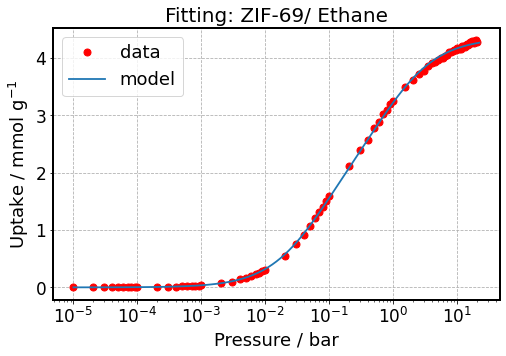

RMSE:   0.004998759091674708
MODEL:  Quadratic
{'M': 2.5382330621786715, 'Ka': 0.8609397948735743, 'Kb': 0.989358435709947}


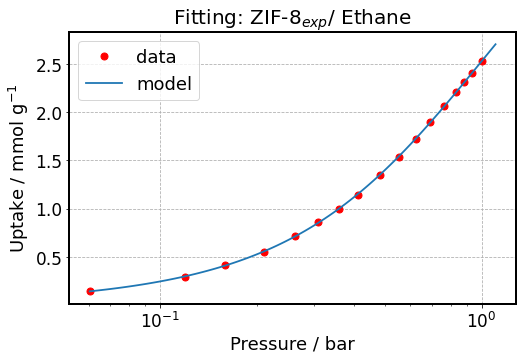

RMSE:   0.06818568850032967
MODEL:  Quadratic
{'M': 2.6809255923039883, 'Ka': 4.179220221613292, 'Kb': 4.2398961929357935}


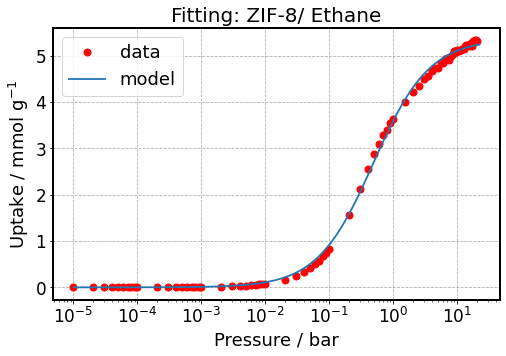

RMSE:   0.016890142147809626
MODEL:  Quadratic
{'M': 1.9360971061788925, 'Ka': 253.06613043314474, 'Kb': 74491.90259744457}


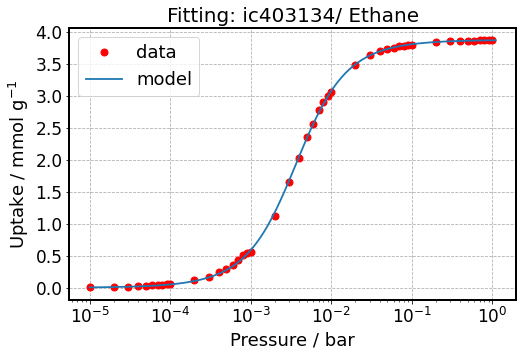

In [ ]:
### TEST ###
os.chdir(bas_path)
os.chdir('ethane')
### TEST ###
for i in range(len(bin_list)):
    #N_pick = 8
    iso_tmp = bin_list[i][0]
    rmse_tmp = iso_tmp.rmse
    model_tmp = iso_tmp.model
    param_tmp = iso_tmp.params

    #pyiast.plot_isotherm(iso_tmp,withfit = False)
    #iso_tmp.print_params()
    print('RMSE:  ',rmse_tmp)
    print('MODEL: ', model_tmp)
    print(param_tmp)
    plt.figure(figsize = [1.6*5,1*5])
    ppp = np.array(iso_tmp.df['P'])
    qqq =np.array(iso_tmp.df['q'])
    plt.rcParams['axes.linewidth'] = 2
    plt.semilogx(ppp,qqq,'ro',mfc = 'r',markersize = 7)
    if ppp[0] < 0:
        p_tmp = np.logspace(np.log10(ppp[1]),np.log10(ppp[-1]*1.1),101)
    else:
        p_tmp = np.logspace(np.log10(ppp[0]),np.log10(ppp[-1]*1.1),101)
    plt.plot(p_tmp,iso_tmp.loading(p_tmp),lw = 1.8)
    plt.grid(linestyle = '--')
    plt.xlabel('Pressure / bar',fontsize = 18)
    plt.ylabel('Uptake / mmol g$^{-1}$',fontsize = 18)
    plt.legend(['data','model'], fontsize = 18)
    plt.xticks(fontsize = 17)
    plt.yticks(fontsize = 17)
    #plt.title('Fitting: ' + Name_list[N_pick] + '/ Ethane',fontsize = 14.5)
    plt.title('Fitting: ' + Name_list[i] + '/ Ethane',fontsize = 20)
    plt.savefig(Name_list[i]+'_ethane.png')
    plt.show()

os.chdir(bas_path)


In [ ]:

#os.listdir()
os.getcwd()

'/content/drive/My Drive/Work_in_PNU/Data_C2_ALL_ver03'

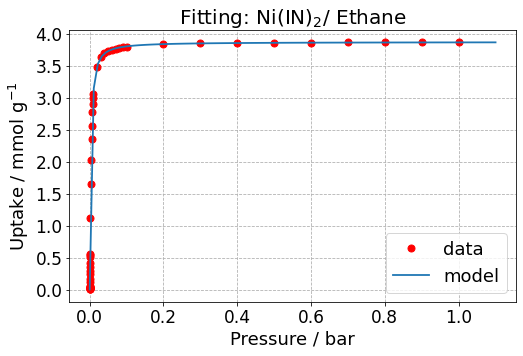

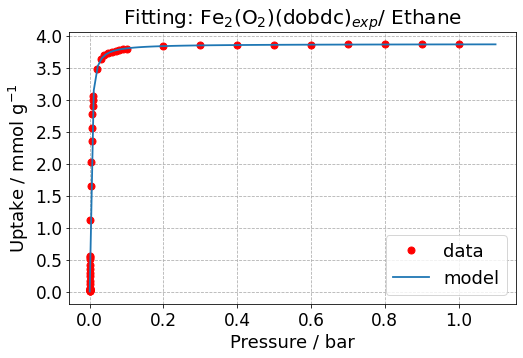

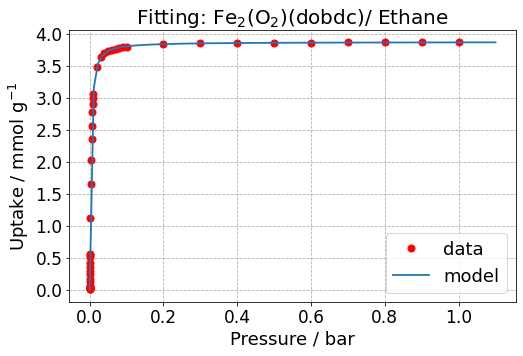

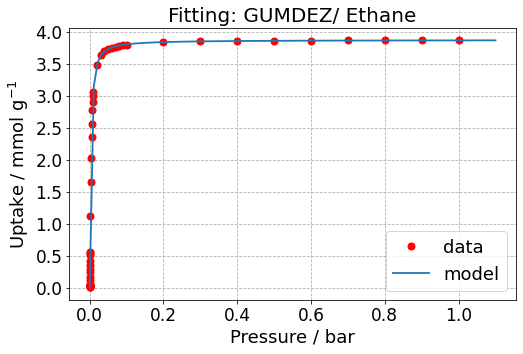

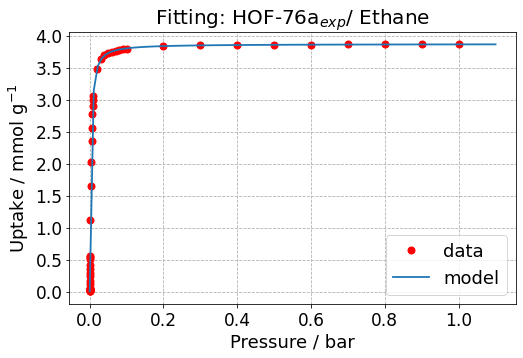

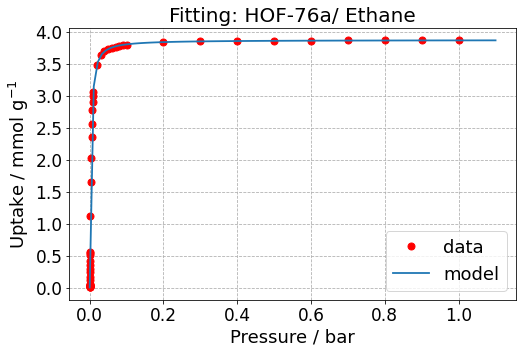

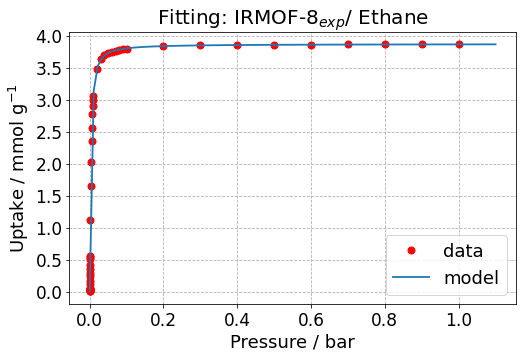

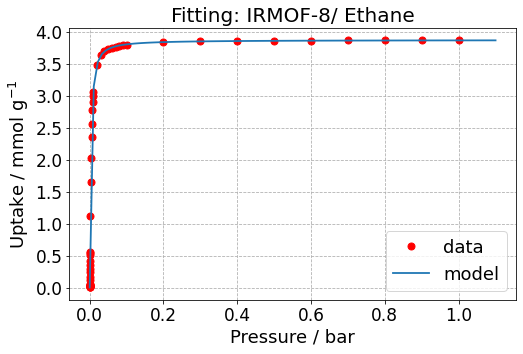

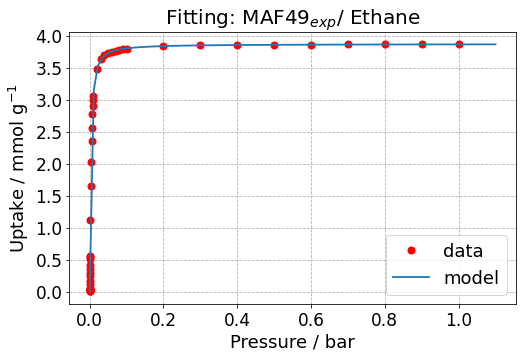

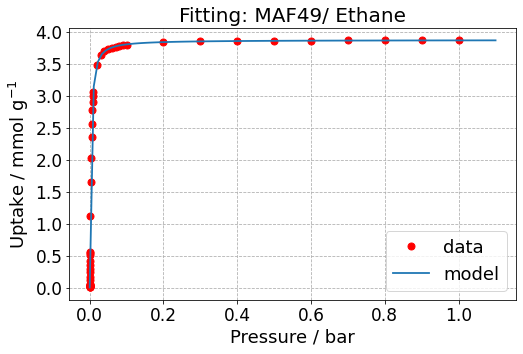

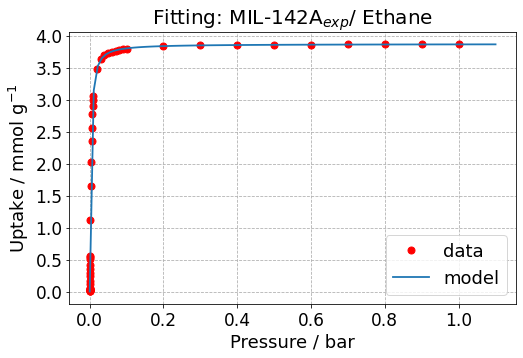

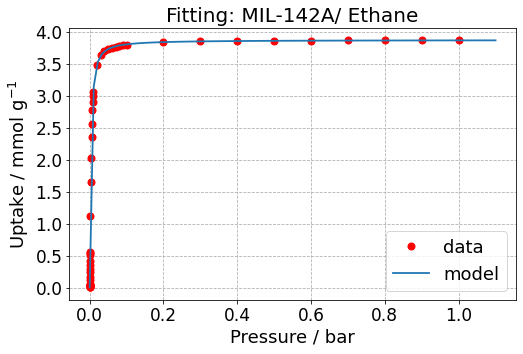

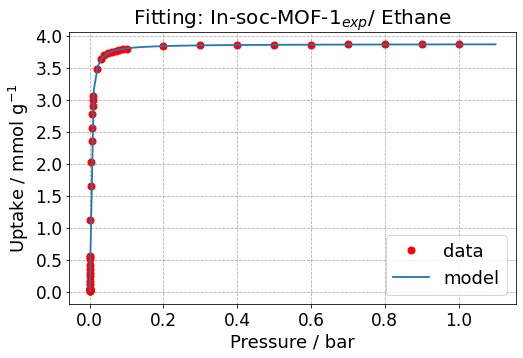

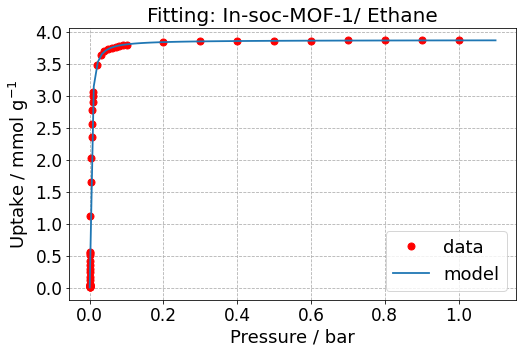

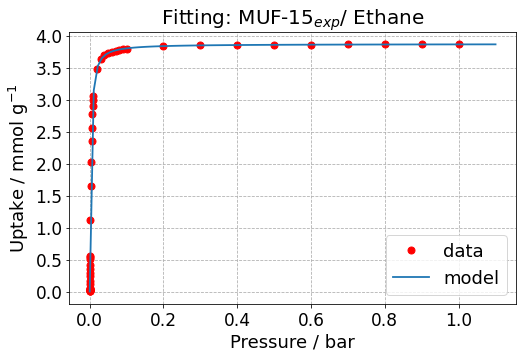

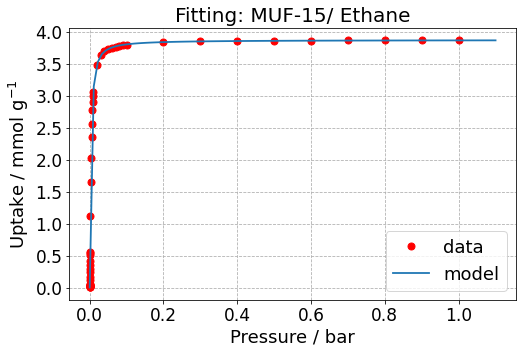

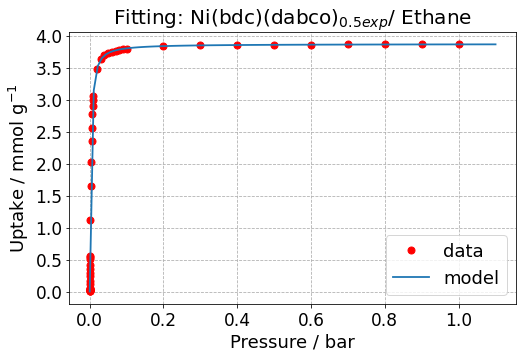

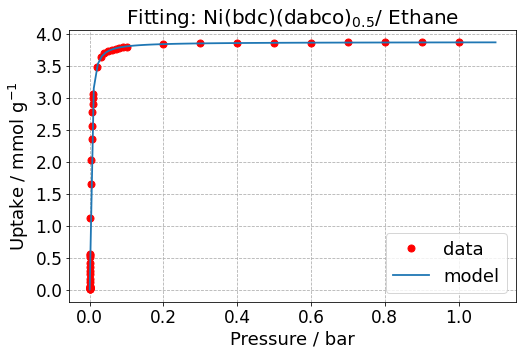

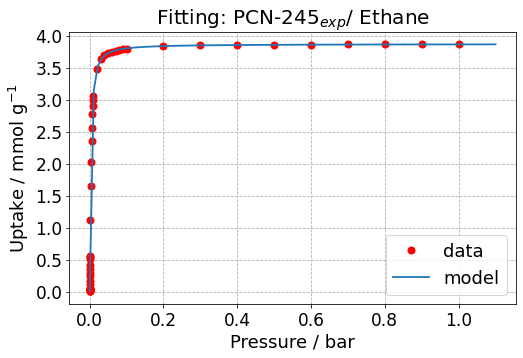

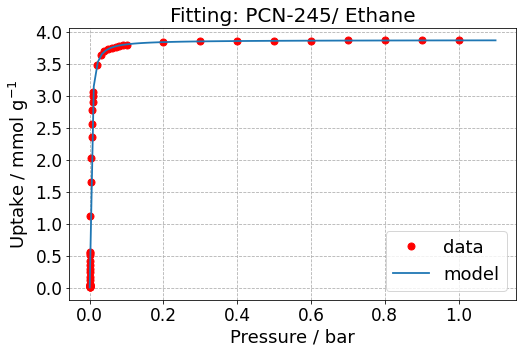

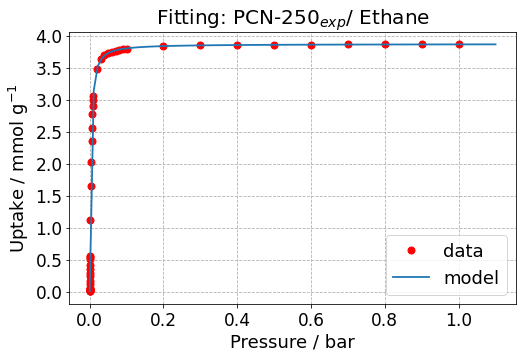

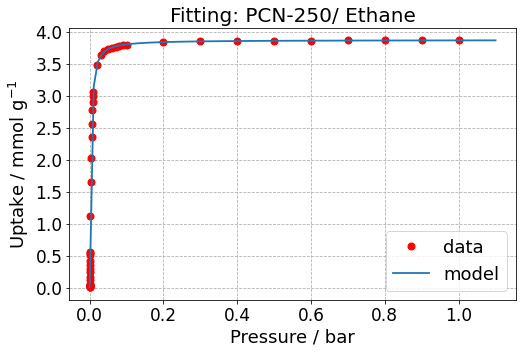

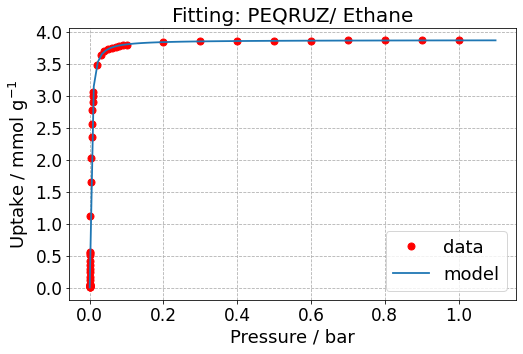

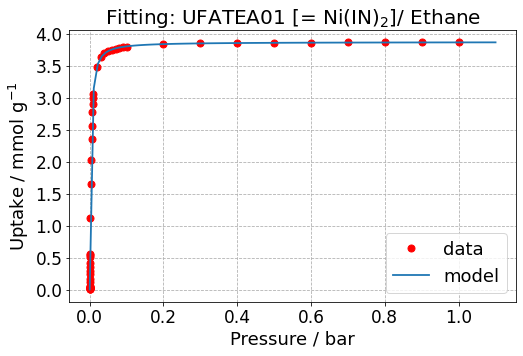

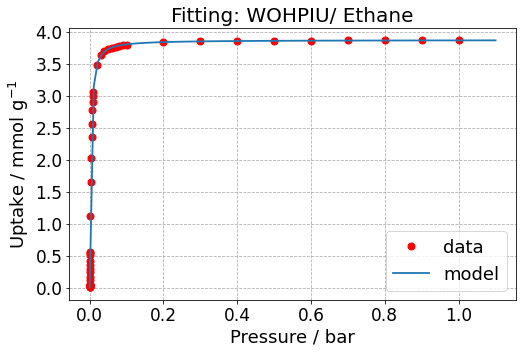

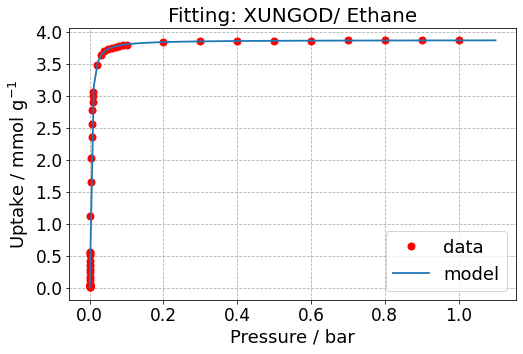

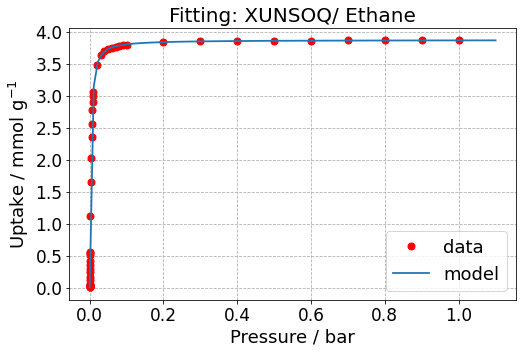

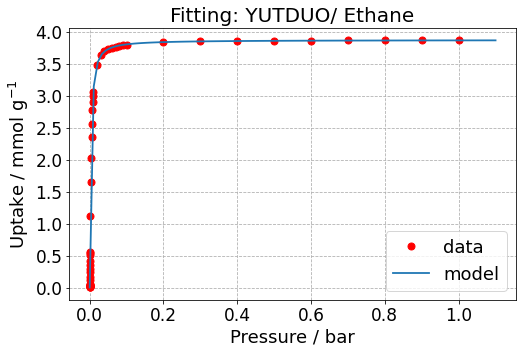

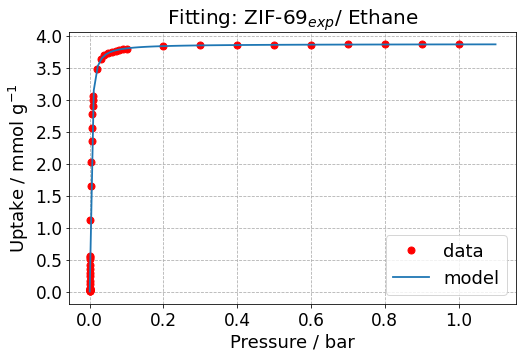

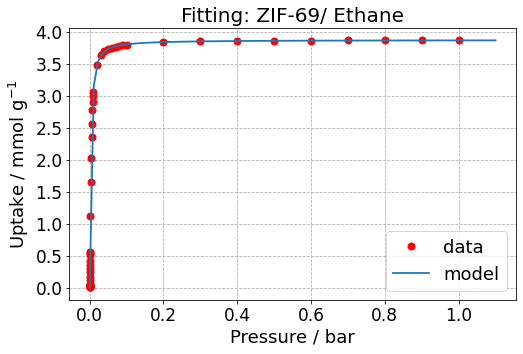

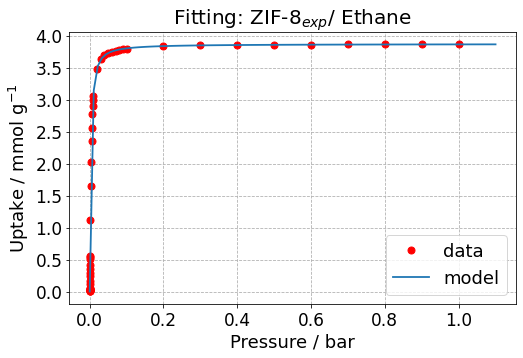

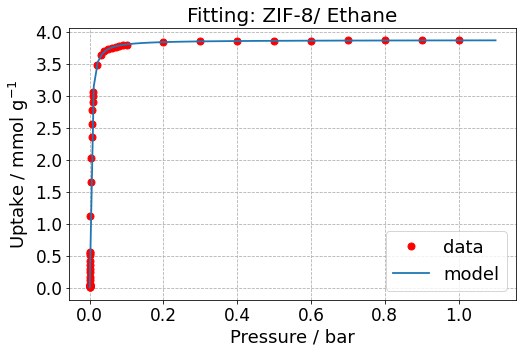

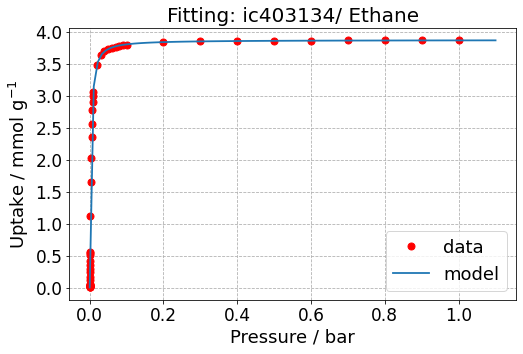

In [ ]:
for i in range(len(bin_list)):
    plt.figure(figsize = [1.6*5,1*5])
    ppp = np.array(iso_tmp.df['P'])
    qqq =np.array(iso_tmp.df['q'])
    plt.plot(ppp,qqq,'ro',mfc = 'r',markersize = 7)
    p_tmp = np.linspace(ppp[0],ppp[-1]*1.1,101)
    plt.plot(p_tmp,iso_tmp.loading(p_tmp),lw = 1.8)
    plt.grid(linestyle = '--')
    plt.xlabel('Pressure / bar',fontsize = 18)
    plt.ylabel('Uptake / mmol g$^{-1}$',fontsize = 18)
    plt.legend(['data','model'], fontsize = 18)
    plt.xticks(fontsize = 17)
    plt.yticks(fontsize = 17)
    #plt.title('Fitting: ' + Name_list[N_pick] + '/ Ethane',fontsize = 14.5)
    plt.title('Fitting: ' + Name_list[i] + '/ Ethane',fontsize = 20)
    plt.savefig(Name_list[i]+'_ethane.png')
    plt.show()




### [2-3] Load the "heat of adsoroption" data

In [ ]:
os.listdir()

['iso_bins',
 'Reference_temperature.xlsx',
 'heat_summary.xlsx',
 'is_experimental_data.xlsx',
 'Names.xlsx',
 'Names.csv',
 'Rec.csv',
 'Recovery_vacuu_1vs15_full.png',
 'Recovery_vacuu_1vs15_top7.png',
 'bar_3vs40_1vs15.png']

In [ ]:
os.chdir(bas_path)
dH_pd = pd.read_excel('heat_summary.xlsx')
dH_arr_uncut= np.array(dH_pd[dH_pd.keys()])[Names_arg]
dH_arr = dH_arr_uncut[:,1:3]
print(dH_arr)
print('Number of Candi.: ', len(dH_arr))
#print(dH_list[1:,1]) # ethane   (HEAVY KEY)
#print(dH_list[1:,2]) # ethylene (PRODUCT)

#dH_CO2 = np.loadtxt('Heat_ad_CO2_case.csv', delimiter =',') # [ CH4, H2S, CO2, C2H6 ]
#dH_H2S = np.loadtxt('Heat_ad_H2S_case.csv', delimiter =',') # [ CH4, H2S, CO2, C2H6 ]

[[-34.5 -33.3]
 [-66.8 -36.5]
 [-24.8386332 -22.56761609]
 [-41.412752898200004 -37.1338160803]
 [-22.8 -20.6]
 [-20.28641291 -18.45839875]
 [-52.5 -50.0]
 [-16.78625946 -15.18738426]
 [-60.0 -48.0]
 [-48.24271597 -43.71913831]
 [-27.2 -26.2]
 [-24.62062245 -22.34749355]
 [-28.4 -25.2]
 [-29.44100189 -26.8242619]
 [-29.2 -28.2]
 [-30.61224309 -27.8459957]
 [-21.5 -18.3]
 [-23.06784991 -20.96893662]
 [-22.8 -21.0]
 [-22.25572796 -20.17492977]
 [-23.2 -21.1]
 [-27.20507133 -24.6075578]
 [-37.41994421300001 -33.6747081006]
 [-40.4991767953 -36.4686149938]
 [-40.4880359217 -36.2881237145]
 [-38.506784742200004 -34.7201414779]
 [-37.219482144400004 -33.4767456996]
 [-39.950750618200004 -36.415848727900006]
 [-26.0 -23.0]
 [-33.34546211 -29.96588295]
 [-17.2 -16.1]
 [-22.67311765 -20.65735238]
 [-39.042359459900005 -35.2307356543]]
Number of Candi.:  33


# [3] Mixture Isotherm Function

In [ ]:
Arrh = lambda T,dH ,T_ref: np.exp(-dH/8.3145*(1/T - 1/T_ref)) # Arrhenius equation (Clasius-Clapeyron Equation)

### Isothermal mixture isotherm
def iso_mix(P_par, T, iso_list, dH_list,Tref_list):
    P_norm = []
    for (p,dh,tref) in zip(P_par, dH_list,Tref_list):
        p_n = Arrh(T,dh,tref)*p
        P_norm.append(p_n)
    P_norm_arr = np.array(P_norm)
    #print(P_norm_mat.T)m
    if P_norm_arr.ndim > 1:
        for i in range(len(P_norm[0])):
            p_tmp = P_norm_arr[i,:]
            p_tmp[p_tmp<0.000001] = 0.000001
            q_IAST_tmp = pyiast.iast(p_tmp,
                            iso_list,
                            warningoff=True)
    else:
        try:
            p_tmp = P_norm_arr
            p_tmp[p_tmp<0.000001] = 0.000001
            #print(p_tmp)
            q_IAST_tmp = pyiast.iast(p_tmp,
                                    iso_list,
                                     warningoff=True)
        except:    
            try:
                #print('Initial guess error with P = ',P_par)
                x_IG = np.ones(len(p_tmp))/len(p_tmp)
                q_IAST_tmp = pyiast.iast(p_tmp,
                                        iso_list,adsorbed_mole_fraction_guess = x_IG,
                                        warningoff=True)
            except:
                try:
                    arg_min = np.argmin(p_tmp)
                    p_tmp[p_tmp<0.000001] = 0.000001
                    x_IG = 0.01*np.ones(len(p_tmp))
                    x_IG[arg_min] = 1 - 0.01*(len(p_tmp)-1)
                    #print(x_IG)
                    q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                except:
                    arg_max = np.argmax(p_tmp)
                    p_tmp[p_tmp<0.000001] = 0.000001
                    x_IG = 0.01*np.ones(len(p_tmp))
                    x_IG[arg_max] = 1 - 0.01*(len(p_tmp)-1)
                    #print(x_IG)
                    q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)
        
    return q_IAST_tmp
### TEST  ###
iso_res_test = iso_mix([0.475, 0.025], 300, bin_list[0], dH_arr[0],[298.15,298.15])
print('Ethane   uptake: {:6.4f}'.format(iso_res_test[0]))
print('Ethylene uptake: {:6.4f}'.format(iso_res_test[1]))

Ethane   uptake: 2.9449
Ethylene uptake: 0.0622


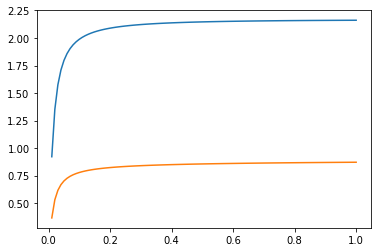

In [ ]:
P_tes = np.linspace(1/101,1,101)
ut_tes1 = []
ut_tes2 = []
for p in P_tes:
    ut = iso_mix(np.array([0.5,0.5])*p, 300,bin_list[0], dH_arr[0],[298.15,298.15])
    ut_tes1.append(ut[0])
    ut_tes2.append(ut[1])
ut_tes1 = np.array(ut_tes1)
ut_tes2 = np.array(ut_tes2)
plt.plot(P_tes,ut_tes1)
plt.plot(P_tes,ut_tes2)

# [4] Ideal PSA Function

### [4-1] Saturation fraction

In [ ]:
def sat_fraction(y_lead,q_lead_array, y_follow,q_follow_array):
    q_sat_lead_part, q_sat_lead_tot, q_des_lead = q_lead_array
    q_sat_fo, q_des_fo = q_follow_array
    numo = y_follow*(q_sat_lead_part - q_des_lead)+y_lead*q_des_fo
    denom = y_follow*(q_sat_lead_part - q_sat_lead_tot)+y_lead*q_sat_fo
    sat_frac = numo/denom
    return sat_frac

### [4-2] Purity function at exhaust gas

ORIGIANAL

In [ ]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[0] # Ethane (C2H6)
    iso_2 = iso_input[1] # Ethylene (C2H4)
    iso  = [iso_1,iso_2]
    dH_1, dH_2 = dH_input[:2]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH_input,Tref_input)
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH_input,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    dq = q_sat_tot - q_des
    x_out = dq/(np.sum(dq))
    return x_out,ind_lead_tot

## TEST
x_guess = np.array([0.84,0.16])
y_feed_in = np.array([0.83356,0.1644])
P_h = 3
P_l = 0.2
T_tri = [298,]*2
res_test = x2x(x_guess, P_h,P_l,
               bin_list[0], dH_arr[0,:], T_tri,
               y_feed_in, 298)
#x_test = res_test[-1]
print(res_test)

(array([0.778158, 0.221842]), 0)


MODIFIED

In [ ]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[0] # Ethane (C2H6)
    iso_2 = iso_input[1] # Ethylene (C2H4)
    iso  = [iso_1,iso_2]
    dH_1, dH_2 = dH_input[:2]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    #print(P_low_part)
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH_input,Tref_input)
    #print(P_high_part)
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH_input,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    dq = q_sat_tot - q_des
    x_out = dq/(np.sum(dq))
    return x_out,ind_lead_tot

## TEST
x_guess = np.array([0.84,0.16])
y_feed_in = np.array([0.83356,0.1644])
P_h = 3
P_l = 0.2
T_tri = [298,]*2
res_test = x2x(x_guess, P_h,P_l,
               bin_list[0], dH_arr[0,:], T_tri,
               y_feed_in, 298)
#x_test = res_test[-1]
print(res_test)

(array([0.778158, 0.221842]), 0)


In [ ]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[0] # Ethane (C2H6)
    iso_2 = iso_input[1] # Ethylene (C2H4)
    iso  = [iso_1,iso_2]
    dH_1, dH_2 = dH_input[:2]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    #print(P_low_part)
    P_low_part = np.reshape(P_low_part,len(iso))
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH,Tref_input)
    #print(P_high_part)
    P_high_part = np.reshape(P_high_part,len(iso))
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    dq = q_sat_tot - q_des
    x_out = dq/(np.sum(dq))
    return x_out,ind_lead_tot



def rec(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    def x_err(xx):
        x_new,i_lead = x2x([xx, 1-xx],P_high,P_low,
                           iso_input, dH_input, Tref_input, 
                           yfeed,Tfeed)
        return (xx-x_new[0])**2
    #sol = optim.minimize(x_err,x_ini,method='COBYLA')
    sol = optim.least_squares(x_err,x_ini,bounds = [0,1])
    x_sol = sol.x
    _,i_lead = x2x([x_sol, 1- x_sol],P_high,P_low,
                   iso_input, dH_input, Tref_input, 
                   yfeed,Tfeed)
    #if i_lead  < 0.5:
    #    return -1
    Recovery = 1-(1-x_sol)/x_sol*yfeed[0]/yfeed[1]
    if Recovery < 0 or Recovery > 1:
        Recovery = 1-x_sol/(1-x_sol)*yfeed[1]/yfeed[0]
    return Recovery, i_lead, x_sol

x_guess = 0.85
y_feed_in = np.array([0.83356,0.1644])
rec_res_test = rec(x_guess, 1,0.005,
                   bin_list[5], dH_arr[5,:], T_tri,
                   y_feed_in, 298)
print(rec_res_test)

    

(array([0.46624251]), 1, array([0.90475545]))


# [5] Sensitivity Analaysis

In [ ]:

#y_feed_in = np.array([0.83356,0.1644])
y_ethy = 15/16
#y_ethy = 0.83356
y_feed_in = np.array([1-y_ethy,y_ethy])
Rec_list_set = []
leading_index_set = []
#Pl_list = np.linspace(0.004,0.5,30)
Pl_list = 1/(10**np.linspace(1,5,41))
for binn,dH,Tr in zip(bin_list, dH_arr,Tref_list):
    Rec_list = []
    leading_index = []
    x_guess = np.array([0.05,0.95])
    for pl in Pl_list:
        rec_tmp,l_ind,x_tmp = rec(x_guess[0], 1,pl,
                                  binn, dH, [Tr,Tr],
                                  y_feed_in, 298)
        #x_guess[0] = x_tmp*1.01
        Rec_list.append(rec_tmp)
        leading_index.append(l_ind)
    Rec_list_set.append(Rec_list)
    leading_index_set.append(leading_index)

# [5-2] Sorting

In [ ]:
for i in range(len(Name_list)):
    print(i, Name_list[i])

0 Ni(IN)$_2$
1 Fe$_2$(O$_2$)(dobdc)$_{exp}$
2 Fe$_2$(O$_2$)(dobdc)
3 GUMDEZ
4 HOF-76a$_{exp}$
5 HOF-76a
6 IRMOF-8$_{exp}$
7 IRMOF-8
8 MAF49$_{exp}$
9 MAF49
10 MIL-142A$_{exp}$
11 MIL-142A
12 In-soc-MOF-1$_{exp}$
13 In-soc-MOF-1
14 MUF-15$_{exp}$
15 MUF-15
16 Ni(bdc)(dabco)$_{0.5 exp}$
17 Ni(bdc)(dabco)$_{0.5}$
18 PCN-245$_{exp}$
19 PCN-245
20 PCN-250$_{exp}$
21 PCN-250
22 PEQRUZ
23 UFATEA01 [= Ni(IN)$_2$]
24 WOHPIU
25 XUNGOD
26 XUNSOQ
27 YUTDUO
28 ZIF-69$_{exp}$
29 ZIF-69
30 ZIF-8$_{exp}$
31 ZIF-8
32 ic403134


In [ ]:
Rec_sort_tmp = []
for i in range(len(Rec_list_set)):
    rec_tmm = np.reshape(np.array(Rec_list_set[i]),[-1])
    Rec_sort_tmp.append(rec_tmm)
Rec_sort_tmp = np.array(Rec_sort_tmp)

Sort_target = np.reshape(np.array(Rec_sort_tmp)[:,-1],-1)
#print(Sort_target)
arg_st = np.argsort(Sort_target)[::-1]
Name_sort = np.array(Name_list)[arg_st]

Rec_sort = Rec_sort_tmp[arg_st,:]
leading_sort = np.array(leading_index_set)[arg_st]
is_exp_sort = is_exp[arg_st]

print(Pl_list[-5]*100)
print(Name_sort)
print(Rec_sort[:,-5])

0.002511886431509582
['MAF49$_{exp}$' 'Fe$_2$(O$_2$)(dobdc)$_{exp}$' 'UFATEA01 [= Ni(IN)$_2$]'
 'XUNSOQ' 'MAF49' 'XUNGOD' 'GUMDEZ' 'ic403134' 'PEQRUZ' 'WOHPIU' 'YUTDUO'
 'Ni(IN)$_2$' 'In-soc-MOF-1' 'PCN-250' 'Fe$_2$(O$_2$)(dobdc)' 'MIL-142A'
 'ZIF-8' 'HOF-76a' 'PCN-245' 'HOF-76a$_{exp}$' 'Ni(bdc)(dabco)$_{0.5}$'
 'MUF-15' 'ZIF-69' 'PCN-250$_{exp}$' 'IRMOF-8$_{exp}$' 'ZIF-8$_{exp}$'
 'MUF-15$_{exp}$' 'ZIF-69$_{exp}$' 'Ni(bdc)(dabco)$_{0.5 exp}$'
 'PCN-245$_{exp}$' 'MIL-142A$_{exp}$' 'In-soc-MOF-1$_{exp}$' 'IRMOF-8']
[0.78159376 0.76601787 0.71138631 0.70863893 0.69350875 0.68939407
 0.68417165 0.6861919  0.68293666 0.67948034 0.67765894 0.59601046
 0.5790449  0.54749444 0.51539827 0.49506242 0.49204347 0.48753567
 0.48530806 0.47632344 0.4732415  0.46492257 0.46188043 0.45416018
 0.45404323 0.44501083 0.43648075 0.37420763 0.37171483 0.346822
 0.30488216 0.30401231 0.26306094]


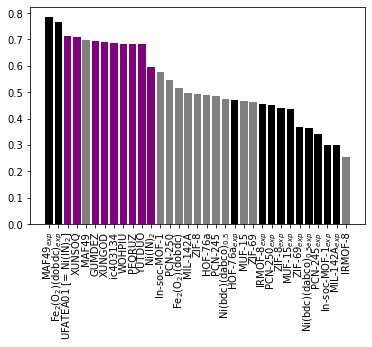

In [ ]:
Name_exp = []
Rec_exp = np.zeros(len(Name_sort))
Name_sim = []
Rec_sim = np.zeros(len(Name_sort))
Name_CM = []
Rec_CM = np.zeros(len(Name_sort))

xax_ran = np.arange(0,len(Rec_exp))

purples = [4,12,13,14,15,16,17,18,19,21,22,32]
is_exp_sort[purples] = -1

for i in range(len(Name_sort)):
    nam = Name_sort[i]
    Name_exp.append(' ')
    Name_sim.append(' ')
    Name_CM.append(' ')
    if nam[-3] == 'p':
        Rec_exp[i] = Rec_sort[i,-1]
        Name_exp[i] = Name_sort[i]
    elif is_exp_sort[i] < -0.5:
        Rec_CM[i] = Rec_sort[i,-1]
        Name_CM[i] = Name_sort[i]
    else:
        Rec_sim[i] = Rec_sort[i,-1]
        Name_sim[i] = Name_sort[i]
plt.bar(xax_ran,Rec_exp,facecolor = 'k')
plt.xticks(xax_ran,np.array(Name_exp),rotation = 90)

plt.bar(xax_ran,Rec_CM,facecolor = 'grey')
plt.xticks(xax_ran,np.array(Name_CM),rotation = 90)

plt.bar(xax_ran,Rec_sim,facecolor = 'purple')

plt.xticks(xax_ran,Name_sort,rotation = 90)

plt.show()

#plt.bar(np.arange(0,len(Rec_exp)), Rec_sim,'r')
#plt.xlabel(np.array(Name_sim))
#plt.bar(np.arange(0,len(Rec_exp)), Rec_CM,'grey')
#plt.xlabel(np.array(Name_CM))



In [ ]:
np.savetxt('Names.csv', Name_sort, fmt = '%s')
np.savetxt('Rec.csv',Rec_sort[:,-1] )

# [5-3] Graphs

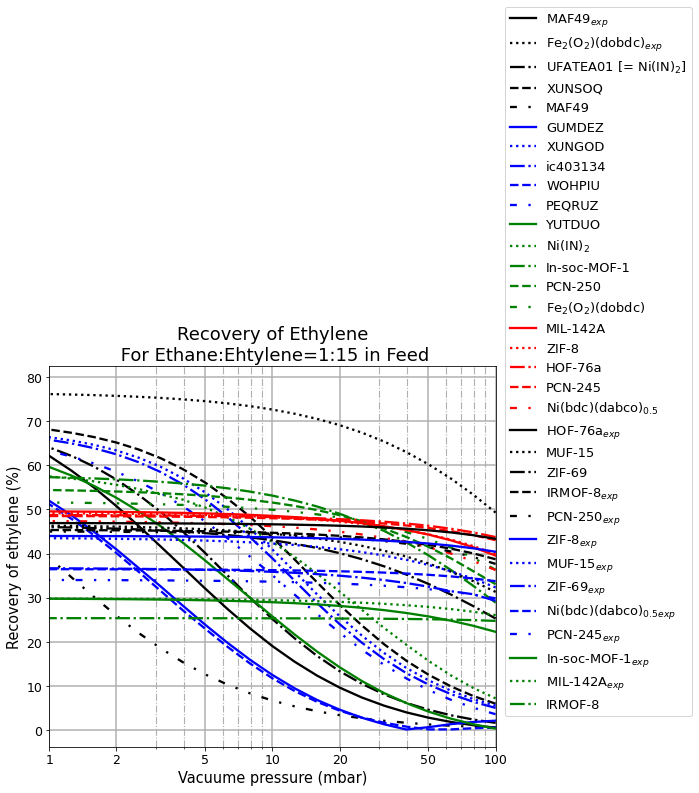

In [ ]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = ['solid','dotted','dashdot','dashed'] + [(0,(3,5,1,5,1,5))]
c_list = ['k','b','g','r']
cc = 0
lc = 0
## Semilog graph
plt.figure(figsize= [8,7])
for RR,nn in zip(Rec_sort,Name_sort):
    plt.semilogx(Pl_list*1000,np.array(RR)*100,label = nn,
                 color = c_list[cc],linewidth = 2.3,linestyle =L_styles[lc])
    lc = lc + 1
    if lc  > len(L_styles)-1:
        cc = cc + 1
    if lc > len(L_styles)-1:
        lc = 0
    if cc > len(c_list)-1:
        cc = 0

## Grid
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
plt.legend(fontsize = 13,loc = (1.02,0.08))
## x,y axis
plt.xlabel('Vacuume pressure (mbar)',fontsize = 14.5)
plt.ylabel('Recovery of ethylene (%)',fontsize= 14.5)
plt.xlim([1.0, 100])
plt.xticks(ticks= [1.0, 2.0, 5,10,20,50,100],
           labels = ['1','2','5','10','20','50','100'],
           fontsize = 12.5)
plt.yticks(fontsize = 12.5)
plt.title('Recovery of Ethylene\n For Ethane:Ehtylene=1:15 in Feed',fontsize = 18)
plt.savefig('Recovery_vacuu_1vs15_full.png')
plt.show()

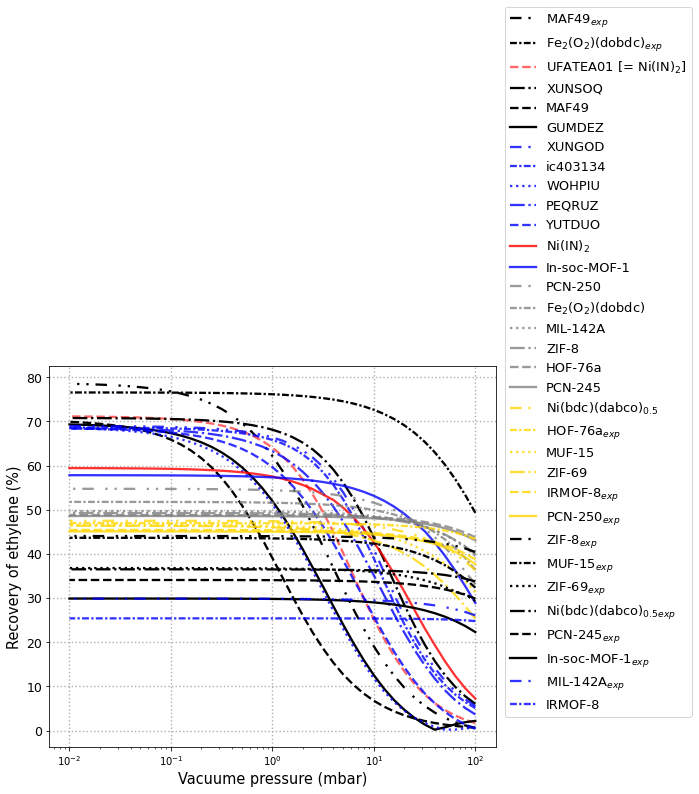

In [ ]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = [(0,(5,3,1,3,1,5)), (0,(3,1,1,1))]+['dotted','dashdot','dashed','solid']
#L_styles = [(0,(3,1,1,1))]+['dotted','dashdot','dashed','solid']
#c_list = ['k','r','b','c']
c_list = ['k','blue','grey','gold']
cc = 0
lc = 0
## Semilog graph
plt.figure(figsize= [8,7])
for RR,nn in zip(Rec_sort,Name_sort):
    LSLS = L_styles[lc]
    CCC = c_list[cc]
    alp = 1
    if nn[0] == 'N' and nn[3] == 'I':
        LSLS = '-'
        CCC = 'r'
        lc = lc-1
    if cc > 0.5:
        alp = 0.8
    if nn[0] == 'U' and nn[1] == 'F':
        LSLS = '--'
        CCC = [1,0.4,0.4]
    plt.semilogx(Pl_list*1000,np.array(RR)*100,alpha = alp, label = nn,
                 color = CCC,linewidth = 2.3,linestyle =LSLS)
    lc = lc + 1
    if lc  > len(L_styles)-1:
        cc = cc + 1
    if lc > len(L_styles)-1:
        lc = 0
    if cc > len(c_list)-1:
        cc = 0

## Grid
plt.grid(which = 'major',ls =':',linewidth = 1.4)
#plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
plt.legend(fontsize = 13,loc = (1.02,0.08))
#plt.legend(fontsize = 13,loc = 0)
## x,y axis
plt.xlabel('Vacuume pressure (mbar)',fontsize = 14.5)
plt.ylabel('Recovery of ethylene (%)',fontsize= 14.5)
#plt.xlim([1.0, 100])
#plt.xticks(ticks= [1.0, 2.0, 5,10,20,50,100],
#           labels = ['1','2','5','10','20','50','100'],
#           fontsize = 12.5)
plt.yticks(fontsize = 12.5)
#plt.title('Recovery of Ethylene\n For Ethane:Ethylene=1:15 in Feed',fontsize = 18)
plt.savefig('Recovery_vacuu_1vs15_top7.png')
plt.show()

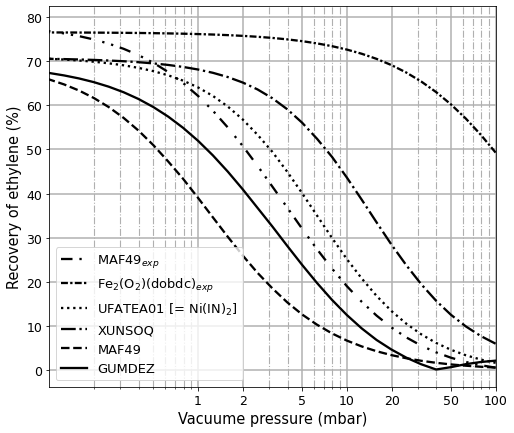

In [ ]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = [(0,(5,3,1,3,1,5)), (0,(3,1,1,1))]+['dotted','dashdot','dashed','solid']
#L_styles = [(0,(3,1,1,1))]+['dotted','dashdot','dashed','solid']
#c_list = ['k','r','b','c']
c_list = ['k','grey']
cc = 0
lc = 0
## Semilog graph
plt.figure(figsize= [8,7])
for RR,nn in zip(Rec_sort[:6],Name_sort[:6]):
    LSLS = L_styles[lc]
    CCC = c_list[cc]
    alp = 1
    if nn[0] == 'N' and nn[3] == 'I':
        LSLS = '-'
        CCC = 'r'
        lc = lc-1
    if cc > 0.5:
        alp = 0.8
    plt.semilogx(Pl_list*1000,np.array(RR)*100,alpha = alp, label = nn,
                 color = CCC,linewidth = 2.3,linestyle =LSLS)
    lc = lc + 1
    if lc  > len(L_styles)-1:
        cc = cc + 1
    if lc > len(L_styles)-1:
        lc = 0
    if cc > len(c_list)-1:
        cc = 0

## Grid
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
#plt.legend(fontsize = 13,loc = (1.02,0.08))
plt.legend(fontsize = 13,loc = 0)
## x,y axis
plt.xlabel('Vacuume pressure (mbar)',fontsize = 14.5)
plt.ylabel('Recovery of ethylene (%)',fontsize= 14.5)
plt.xlim([0.1, 10])
plt.xticks(ticks= [1.0, 2.0, 5,10,20,50,100],
           labels = ['1','2','5','10','20','50','100'],
           fontsize = 12.5)
plt.yticks(fontsize = 12.5)
#plt.title('Recovery of Ethylene\n For Ethane:Ethylene=1:15 in Feed',fontsize = 18)
plt.savefig('Recovery_vacuu_1vs15_top7.png')
plt.show()

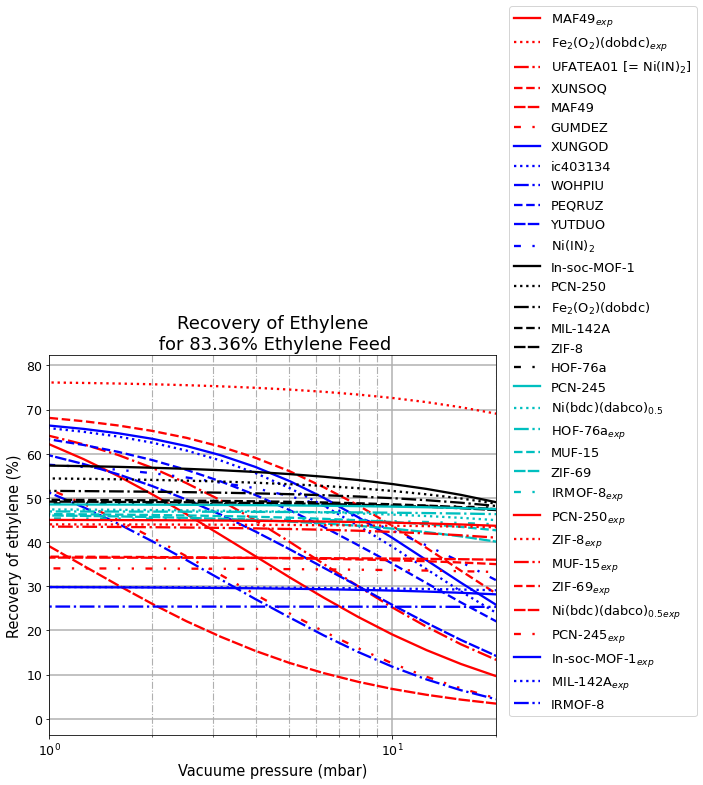

In [ ]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = ['solid','dotted','dashdot','dashed'] + [(0,(5,1)),(0,(3,5,1,5,1,5))]
c_list = ['r','b','k','c']
cc = 0
lc = 0
## Semilog graph
plt.figure(figsize= [8,7])
for RR,nn in zip(Rec_sort,Name_sort):
    plt.semilogx(Pl_list*1000,np.array(RR)*100,label = nn,
                 color = c_list[cc],linewidth = 2.3,linestyle =L_styles[lc])
    lc = lc + 1
    if lc > len(L_styles)-1:
        lc = 0
        cc = cc + 1
    if cc > len(c_list)-1:
        cc = 0

## Grid
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
plt.legend(fontsize = 13,loc = (1.03,0.05))
## x,y axis
plt.xlabel('Vacuume pressure (mbar)',fontsize = 14.5)
plt.ylabel('Recovery of ethylene (%)',fontsize= 14.5)
#plt.xlim([2.5, 100])
#plt.xticks(ticks= [1.8,2,5,10,20,50,100, 500],
#           labels = [' ', '2','5','10','20','50','100'],
#           fontsize = 12.5)
#plt.xticks(ticks= [1.8,2,4,6,10,20, 40],
#           labels = [' ', '2','4','6','10','20','40'],
#           fontsize = 12.5)
plt.xticks(fontsize = 12.5)
plt.xlim([1,20])
plt.yticks(fontsize = 12.5)
plt.title('Recovery of Ethylene\n for 83.36% Ethylene Feed',fontsize = 18)
plt.savefig('Recovery_vacuu_83p_zoom.png')
plt.show()

In [ ]:
print('{0:>12s},{1:>12s},{2:>12s},{3:>12s}'.format('Adsorbent','1 mbar','10 mbar','100 mbar'))
mid = np.int32((len(Pl_list)-1)/2)

for nam,rec in zip(Name_sort, Rec_sort):
    recmb = np.array([rec[-1],rec[mid],rec[0]])*100
    print('{0:>12s},{1:12f},{2:12f},{3:>12f}'.format(nam,
                                                     recmb[0],
                                                     recmb[1],
                                                     recmb[2]))

   Adsorbent,      1 mbar,     10 mbar,    100 mbar
MAF49$_{exp}$,   78.500330,   62.138387,    0.608183
Fe$_2$(O$_2$)(dobdc)$_{exp}$,   76.532433,   76.124865,   49.299180
UFATEA01 [= Ni(IN)$_2$],   71.111174,   64.053054,    1.698326
      XUNSOQ,   70.745747,   68.103554,    6.034678
       MAF49,   69.896171,   39.055153,    0.631678
      GUMDEZ,   69.294042,   51.974963,    2.194435
      XUNGOD,   68.933706,   66.367679,    5.566431
    ic403134,   68.618456,   65.786858,    5.075351
      WOHPIU,   68.448329,   51.192617,    0.632763
      PEQRUZ,   68.426112,   63.249435,    3.654395
      YUTDUO,   68.348725,   59.626006,    0.391415
  Ni(IN)$_2$,   59.414017,   57.496379,    7.240442
In-soc-MOF-1,   57.803049,   57.311351,   28.904677
     PCN-250,   54.727753,   54.400110,   33.087230
Fe$_2$(O$_2$)(dobdc),   51.762246,   51.577936,   36.359325
    MIL-142A,   49.675092,   49.562592,   39.555868
       ZIF-8,   49.255510,   49.154439,   39.940393
     HOF-76a,   48.795466,  

1e-05
0.1


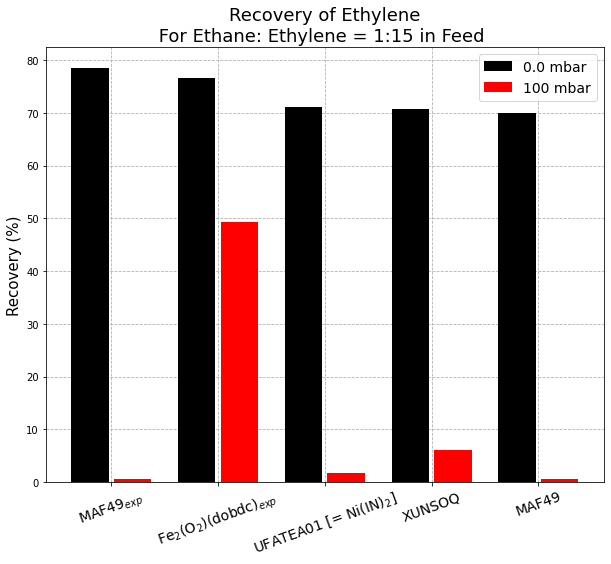

In [ ]:
indx_p = -1
indx_p2 = 0
print(Pl_list[indx_p])
print(Pl_list[indx_p2])
arg1 = np.argsort(Rec_sort[:,indx_p])[-1:-6:-1]
#arg1 = argtmp[:10]
Rec_pick1 = Rec_sort[arg1,indx_p]
Rec_pick2 = Rec_sort[arg1,indx_p2]
Name_pick1 = Name_sort[arg1]

#plt.bar(range(len(Rec_sort[:,-8])),Rec_sort[:,-8])
fig3,ax3 = plt.subplots(figsize=[10,8])
ax3.set_title('Recovery of Ethylene\n For Ethane: Ethylene = 1:15 in Feed  ',fontsize = 18)
plt.grid(ls = '--')
ax3.bar(np.arange(len(Rec_pick1))-0.2,Rec_pick1*100, facecolor= 'k',
        width= 0.35,label = '{:.1f} mbar'.format(Pl_list[indx_p]*1000))
ax3.bar(np.arange(len(Rec_pick2))+0.2,Rec_pick2*100, facecolor= 'r',
        width= 0.35,label = '{:.0f} mbar'.format(Pl_list[indx_p2]*1000))
plt.legend(fontsize = 14)
#plt.ylim([60, 100])
ax3.set_ylabel('Recovery (%)', fontsize = 15)
ax3.set_xticks(np.arange(0,len(Name_pick1),1))
ax3.set_xticklabels(Name_pick1[::1],
                    fontsize = 14,rotation = 20)
ax3.set_axisbelow(True)
fig3.show()
fig3.savefig('bar_3vs40_1vs15.png')
#for i in range(len(Rec_sort)):

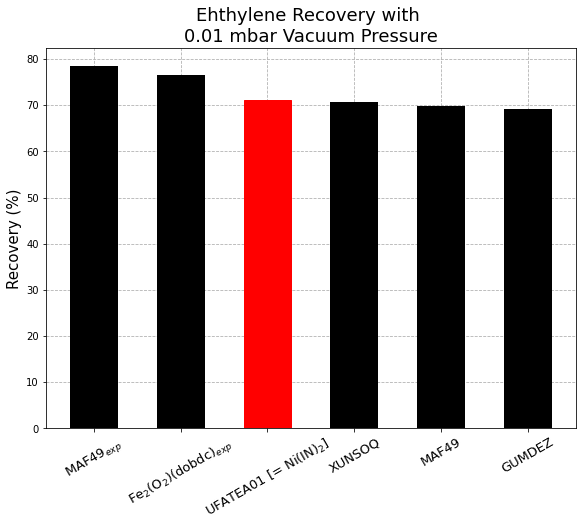

In [ ]:
#plt.bar(range(len(Rec_sort[:,-8])),Rec_sort[:,-8])
#plt.figure(figsize=[10,7])
ind_grp=1

fig2, ax2 = plt.subplots(figsize=[9.5,7])

b1= ax2.bar(Name_sort[:6],Rec_sort[:6,-1]*100,facecolor = 'k', width = 0.55)
#b1.set_facecolor(clrs)

#ax2.set_ylim([60, 70])
ax2.set_ylabel('Recovery (%)', fontsize = 15)
#ax2.set_yticklabels(np.linspace(60,70,6), fontsize=13)
#ax2.set_yticklabels(fontsize=13)
ax2.set_xticklabels(Name_sort[:6],fontsize = 13,rotation= 30)
ax2.set_title('Ehthylene Recovery with \n{:.2f} mbar Vacuum Pressure'.format(Pl_list[-ind_grp]*1000), 
              fontsize = 18)
ax2.set_axisbelow(True)
ax2.grid(ls = '--')
ax2.get_children()[2].set_color('r')

#for i in range(len(Rec_sort)):


# Figure 4

In [ ]:
print(Name_sort[23])
print(Name_sort[24])
print(Name_sort[25])
print(Name_sort[26])
print(Name_sort[27])
print(Name_sort[28])
print(Name_sort[29])
print(Name_sort[30])
print(Name_sort[31])
print(Name_sort[32])


IRMOF-8$_{exp}$
PCN-250$_{exp}$
ZIF-8$_{exp}$
MUF-15$_{exp}$
ZIF-69$_{exp}$
Ni(bdc)(dabco)$_{0.5 exp}$
PCN-245$_{exp}$
In-soc-MOF-1$_{exp}$
MIL-142A$_{exp}$
IRMOF-8


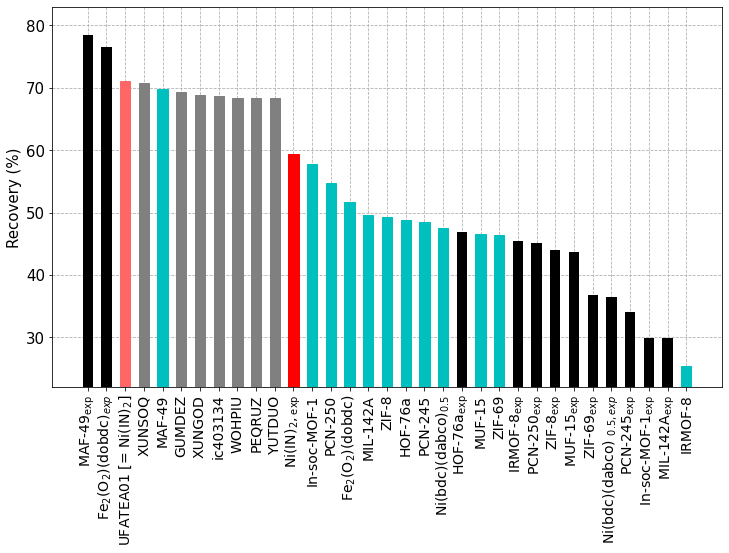

In [ ]:
#plt.bar(range(len(Rec_sort[:,-8])),Rec_sort[:,-8])
#plt.figure(figsize=[10,7])
ind_grp=-1

fig2, ax2 = plt.subplots(figsize=[12,7])
clrs = ['r' if (x == 0) else 'k' for x in range(len(Name_sort)) ]
Name_sort[0] = r'MAF-49$_{\rm exp}$'
#Name_sort[1] = r'$\mathrm{A}Fe_{2}(O_{2})(dobdc)_{\rm exp}$'
Name_sort[1] = 'Fe$_2$(O$_2$)(dobdc)$_{exp}$'
Name_sort[4] = r'MAF-49'
Name_sort[11] = r'Ni(IN)$_{\rm 2} ,_{\rm exp}$'
Name_sort[20] = r'HOF-76a$_{\rm exp}$'

Name_sort[23] = r'IRMOF-8$_{\rm exp}$'
Name_sort[24] = r'PCN-250$_{\rm exp}$'
Name_sort[25] = r'ZIF-8$_{\rm exp}$'
Name_sort[26] = r'MUF-15$_{\rm exp}$'
Name_sort[27] = r'ZIF-69$_{\rm exp}$'
Name_sort[28] = 'Ni(bdc)(dabco) $_{0.5, exp}$'
Name_sort[29] = r'PCN-245$_{\rm exp}$'
Name_sort[30] = r'In-soc-MOF-1$_{\rm exp}$'
Name_sort[31] = r'MIL-142A$_{\rm exp}$'

b1= ax2.bar(Name_sort,Rec_sort[:,ind_grp]*100,facecolor = 'k', width = 0.55)
#r'Primary T$_{\rm eff}$'
#b1.set_facecolor(clrs)

ax2.set_ylim([22, 83])
ax2.set_ylabel('Recovery (%)', fontsize = 15)
plt.yticks(fontsize = 15)

#ax2.set_yticklabels(np.linspace(60,70,6), fontsize=15)
ax2.set_xticklabels(Name_sort,fontsize = 14,rotation=90,
                    fontdict = {'color':'k'} )

#ax2.set_title('Ehthylene Recovery with \n{:.2f} mbar Vacuum Pressure'.format(Pl_list[-ind_grp]*1000), 
#              fontsize = 18)
ax2.set_axisbelow(True)
ax2.grid(ls = '--')

is_exp_sort = np.array(is_exp)[arg_st]
for i in range(0,len(Rec_sort)):
    if is_exp_sort[i] < 0.5:
        ax2.get_children()[i].set_color('grey')

## Edge of the high heat of adsorption cases
#ax2.get_children()[0].set_edgecolor([0.8,0.8,1])
#ax2.get_children()[1].set_edgecolor([0.8,0.8,1])
#ax2.get_children()[0].set_linewidth(2.5)
#ax2.get_children()[1].set_linewidth(2.5)

ax2.get_children()[2].set_color([1,0.4,0.4])
ax2.get_children()[11].set_color('r')
#ax2.get_children()[2].set_color('r')
#ax2.get_children()[11].set_color(np.array([90, 222, 255])/255)

purples = [4,12,13,14,15,16,17,18,19,21,22,32]
for pu in purples:
    ax2.get_children()[pu].set_color('c')

ax2.get_children()[40].set_color('red')

In [ ]:
Rec_sim = [7.11E-01	,
           7.07E-01	,
           6.99E-01	,
           6.93E-01	,
           6.89E-01	,
           6.86E-01	,
           6.84E-01	,
           6.84E-01	,
           6.83E-01	,
           5.78E-01	,
           5.47E-01	,
           5.18E-01	,
           4.97E-01	,
           4.93E-01	,
           4.88E-01	,
           4.86E-01	,
           4.75E-01	,
           4.65E-01	,
           4.64E-01	,
           2.54E-01	]
Name_sim = ['UFATEA01 [= Ni(IN)$_2$]'	,
            'XUNSOQ'	,
            'MAF49'	,
            'GUMDEZ'	,
            'XUNGOD'	,
            'ic403134'	,
            'WOHPIU'	,
            'PEQRUZ'	,
            'YUTDUO'	,
            'In-soc-MOF-1'	,
            'PCN-250'	,
            'Fe$_2$(O$_2$)(dobdc)'	,
            'MIL-142A'	,
            'ZIF-8'	,
            'HOF-76a'	,
            'PCN-245'	,
            'Ni(bdc)(dabco)$_{0.5}$	'	,
            'MUF-15'	,
            'ZIF-69'	,
            'IRMOF-8']

(24.0, 72.0)

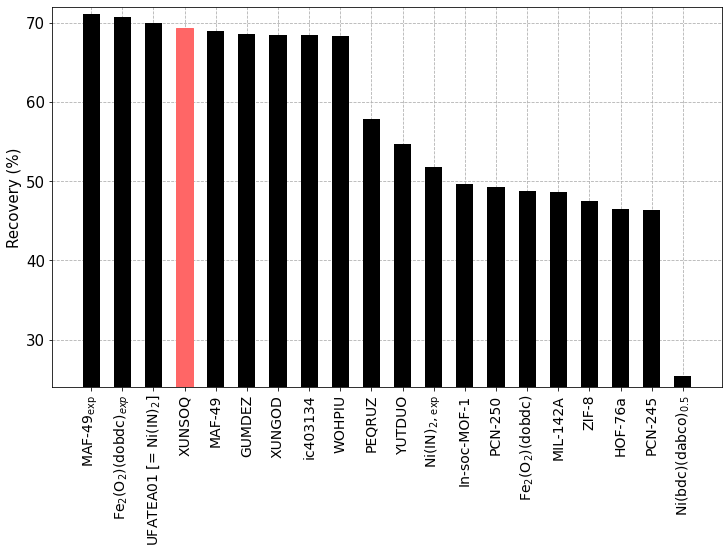

In [ ]:
#plt.bar(range(len(Rec_sort[:,-8])),Rec_sort[:,-8])
#plt.figure(figsize=[10,7])
ind_grp=-1

fig2, ax2 = plt.subplots(figsize=[12,7])
clrs = ['r' if (x == 0) else 'k' for x in range(len(Name_sort)) ]
#Name_sort[0] = r'MAF-49$_{\rm exp}$'
#Name_sort[1] = r'$\mathrm{A}Fe_{2}(O_{2})(dobdc)_{\rm exp}$'
#Name_sort[1] = 'Fe$_2$(O$_2$)(dobdc)$_{exp}$'
Name_sort[4] = r'MAF-49'
Name_sort[11] = r'Ni(IN)$_{\rm 2} ,_{\rm exp}$'
Name_sort[20] = r'HOF-76a$_{\rm exp}$'

Name_sort[23] = r'IRMOF-8$_{\rm exp}$'
Name_sort[24] = r'PCN-250$_{\rm exp}$'
Name_sort[25] = r'ZIF-8$_{\rm exp}$'
Name_sort[26] = r'MUF-15$_{\rm exp}$'
Name_sort[27] = r'ZIF-69$_{\rm exp}$'
Name_sort[28] = 'Ni(bdc)(dabco) $_{0.5, exp}$'
Name_sort[29] = r'PCN-245$_{\rm exp}$'
Name_sort[30] = r'In-soc-MOF-1$_{\rm exp}$'
Name_sort[31] = r'MIL-142A$_{\rm exp}$'

b1= ax2.bar(np.array(Name_exp),np.array(Rec_exp)*100,facecolor = 'k', width = 0.55)
#r'Primary T$_{\rm eff}$'
#b1.set_facecolor(clrs)

ax2.set_ylim([22, 83])
ax2.set_ylabel('Recovery (%)', fontsize = 15)
plt.yticks(fontsize = 15)

#ax2.set_yticklabels(np.linspace(60,70,6), fontsize=15)
ax2.set_xticklabels(Name_sort,fontsize = 14,rotation=90,
                    fontdict = {'color':'k'} )

#ax2.set_title('Ehthylene Recovery with \n{:.2f} mbar Vacuum Pressure'.format(Pl_list[-ind_grp]*1000), 
#              fontsize = 18)
ax2.set_axisbelow(True)
ax2.grid(ls = '--')

is_exp_sort = np.array(is_exp)[arg_st]
#for i in range(0,len(Rec_sort)):
#    if is_exp_sort[i] < 0.5:
#        ax2.get_children()[i].set_color('grey')

## Edge of the high heat of adsorption cases
#ax2.get_children()[0].set_edgecolor([0.8,0.8,1])
#ax2.get_children()[1].set_edgecolor([0.8,0.8,1])
#ax2.get_children()[0].set_linewidth(2.5)
#ax2.get_children()[1].set_linewidth(2.5)

ax2.get_children()[3].set_color([1,0.4,0.4])
#ax2.get_children()[11].set_color('r')
#ax2.get_children()[2].set_color('r')
#ax2.get_children()[11].set_color(np.array([90, 222, 255])/255)

#purples = [4,12,13,14,15,16,17,18,19,21,22,32]
#for pu in purples:
#    ax2.get_children()[pu].set_color('c')
#
#ax2.get_children()[40].set_color('red')
plt.ylim([24,72])

In [ ]:
print('P = ', Pl_list[3]*1000)
for i in range(len(Rec_sort)):
    print('{0:35s}'.format(Name_sort[i]),  ': ', Rec_sort[i,3]*100)

P =  50.11872336272723
MAF49$_{exp}$                       :  2.453659209751269
Fe$_2$(O$_2$)(dobdc)$_{exp}$        :  61.48106545841369
UFATEA01 [= Ni(IN)$_2$]             :  4.195603870118547
XUNSOQ                              :  11.8079419588636
MAF49                               :  1.3200445242045444
XUNGOD                              :  10.612346187287425
GUMDEZ                              :  1.3581362965881194
ic403134                            :  9.766064460072233
PEQRUZ                              :  9.028518759764381
WOHPIU                              :  2.4482643157163975
YUTDUO                              :  3.553575664618791
Ni(IN)$_2$                          :  15.15638942287656
In-soc-MOF-1                        :  39.481645084945804
PCN-250                             :  41.82423039124969
Fe$_2$(O$_2$)(dobdc)                :  43.4040733629706
MIL-142A                            :  44.51751026447308
ZIF-8                               :  44.69464963720588
HOF-7

In [ ]:
print('P = ', Pl_list[10]*1000)
for i in range(len(Rec_sort)):
    print('{0:35s}'.format(Name_sort[i]),  ': ', Rec_sort[i,10]*100)

P =  10.0
MAF49$_{exp}$                       :  17.8758453817488
Fe$_2$(O$_2$)(dobdc)$_{exp}$        :  72.94179457745511
UFATEA01 [= Ni(IN)$_2$]             :  23.63185754609507
XUNSOQ                              :  42.03255448282821
MAF49                               :  6.629068697328366
XUNGOD                              :  39.273164905947546
GUMDEZ                              :  11.748269243539244
ic403134                            :  37.33639130573898
PEQRUZ                              :  34.81824384820011
WOHPIU                              :  13.627061706759802
YUTDUO                              :  24.992459499233057
Ni(IN)$_2$                          :  42.1358520702642
In-soc-MOF-1                        :  53.27317311481804
PCN-250                             :  51.645397055302155
Fe$_2$(O$_2$)(dobdc)                :  49.96098196104566
MIL-142A                            :  48.42024080663112
ZIF-8                               :  48.229958229835624
HOF-76a          

In [ ]:
print('P = ',Pl_list[-1]*1000)
for i in range(len(Rec_sort)):
    print('{0:35s}'.format(Name_sort[i]),  ': ', Rec_sort[i,-1]*100)

P =  0.01
MAF49$_{exp}$                       :  78.45494365573965
Fe$_2$(O$_2$)(dobdc)$_{exp}$        :  76.60769378107764
UFATEA01 [= Ni(IN)$_2$]             :  71.23575811342107
XUNSOQ                              :  70.90098094029358
MAF49                               :  70.0501642698233
XUNGOD                              :  68.97396342656754
GUMDEZ                              :  68.76620559865495
ic403134                            :  68.65737256377439
PEQRUZ                              :  68.37736588379839
WOHPIU                              :  68.28781610878207
YUTDUO                              :  67.91947191341711
Ni(IN)$_2$                          :  59.63030484431891
In-soc-MOF-1                        :  57.91197054919115
PCN-250                             :  54.7544124349409
Fe$_2$(O$_2$)(dobdc)                :  51.54261160193474
MIL-142A                            :  49.50790732610576
ZIF-8                               :  49.20583649489818
HOF-76a                